# 1. Introduction

Dans ce projet, nous avons choisi d’analyser deux séries temporelles ; la première porte sur le taux de chômage en France entre 1968 et 2022 et la seconde porte sur le taux de croissance du PIB français sur la période (1968-2022). Les données sont issues du site de l’INSEE.

Dans un premier temps nous allons réaliser une modélisation univariée de chacune de nos séries temporelles: le taux de croissance du  PIB de la France entre 1968 et 2022  et le taux de chômage de la France entre 1968 et 2022, afin d’analyser l’évolution des valeurs de chacune des séries. Cette partie comportera des représentations graphiques, des autocorrélogrammes simples et partiels et un test de racine unitaire. Suite à cela nous allons stationnariser notre série, selon la méthode adaptée puis déterminer le modèle ARMA correspondant.

Dans un deuxième temps, nous allons faire une modélisation multivariée des séries qui va nous permettre d’analyser les liens de causalité entre les 2 séries dont notamment l’impact d’un choc sur une série sur l’autre série. Pour cela, nous estimerons le modèle VAR avec un nombre de retard optimal. Nous vous présenterons les relations de causalité entre les variables ainsi que les fonctions d'impulsion-réponse. Ce projet se concluera par le test de cointégration de Johansen.





Le code ci-dessous nous permet, dans un premier temps d'importer notre base de données Excel ainsi que de nommer les variables correspondants à nos données.

In [ ]:
install.packages("googledrive")
library(googledrive)

In [ ]:
drive_download("https://docs.google.com/spreadsheets/d/1cwYLefKaLylQ_0qjsVeabxsqzVQ66nGc/edit?usp=share_link&ouid=107279379444030409585&rtpof=true&sd=true")

In [ ]:
library(readxl)
base <- read_excel('data1.xlsx')
#View(base)
annees <- base$annees
chomage <- base$taux_chomage
PIB <- base$taux_PIB

# 2. Représentation graphique et autocorrélogrammes

Nous commençons par représenter le taux de variation du PIB.


## Taux de croissancee du PIB français entre 1968 et 2022

Le code ci-dessous nous permet de représenter graphiquement notre séries représentant le taux du PIB français de 1968 à 2022.


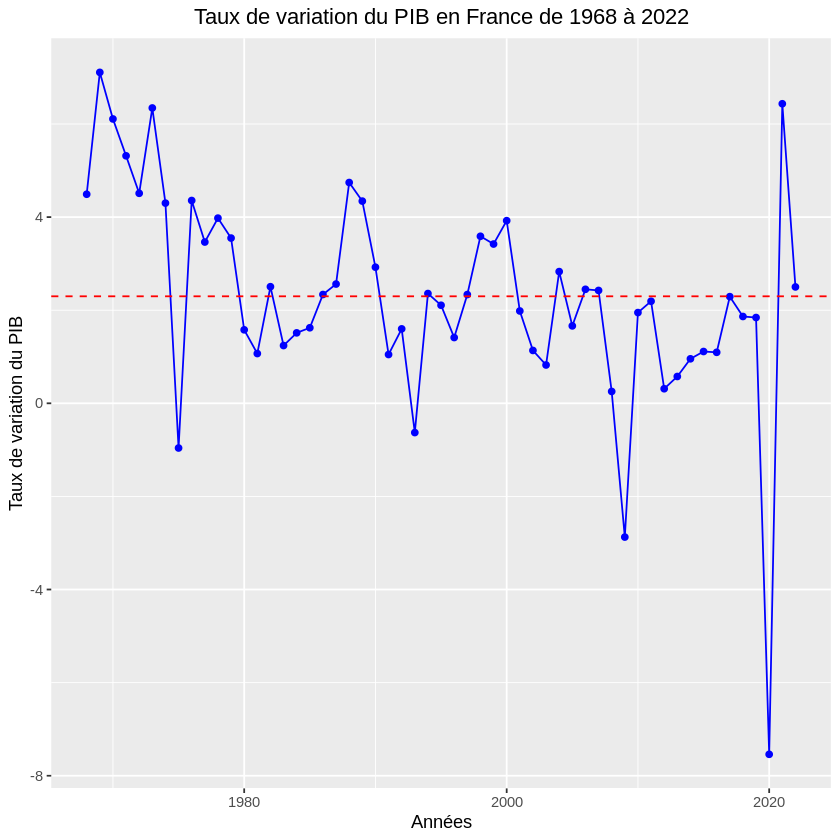

In [ ]:
library(ggplot2)
p_PIB <- ggplot(data=base, aes(x = annees, y = PIB)) + geom_point(color='blue') + geom_line(color='blue') + xlab('Années') + ylab('Taux de variation du PIB') + ggtitle('Taux de variation du PIB en France de 1968 à 2022') + theme(plot.title = element_text(hjust = 0.5)) + geom_hline(yintercept = mean(PIB), linetype = "dashed", color = "red")
p_PIB

D'une manière générale, le taux du PIB oscille autour autour de sa moyenne (en pointillés rouge) de valeur:

```
mean(PIB) = 2.29930862192434
```
Cela nous permet de conclure que le PIB français est en constante progression même si cette progression est moins forte que dans le passé.

Ce graphique nous indique que le taux du PIB fluctue entre -8% et 5%. Cependant, nous remarquons que la majorité de nos données se situent entre 0% et 4%. Notons que 4 points se trouvent sous l'ordonnée 0% et correspondent aux dattes de 1975, 1993, 2009 et 2020. Ces points représentent des crises économiques dont la France a été victime.

On observe notamment une forte récession en 2020 avec un taux de croissance du PIB à quasiment -8%, correspondant à la crise COVID.

De même, on constate en 2008 une chute importante du taux de croissance du PIB avec la crise des subprimes, le taux de croissance est alors proche de -3.5%.

Le baisse du taux de croissance du PIB en 1993 peut s'expliquer par le fait que la France a connu une récession économique à cette période. En effet, en 1992, la France a mis en oeuvre le traité de Maastricht visant à établir l'Union Européenne avec une monnaie unique. Les mesures prises pour la mise en place de ce projet, combinées à d'autres facteurs économiques, ont contribué à la contraction de l'économie française en 1993.

L'impact du choc pétrolier de 1970  sur la croissance du PIB français est également visible sur le graphique puisqu'on observe à cette date un taux de croissance du PIB qui chute fortement après une période de forte croissance( les Trente Glorieuses).



D'après le graphique, nous avons tendance à dire que la série temporelle du taux de variation du PIB français est stationnaire entre 1968 et 2022. Nous allons vérifier notre hypothèse tout au long du projet grâce à l'analyse des  autocorrélogrammes simples et partiels ainsi que des différents tests.

Représentons maintenant les autocorrélogrammes simples et partiels de la série. Nous commençons par l'autocorrélogramme simple.

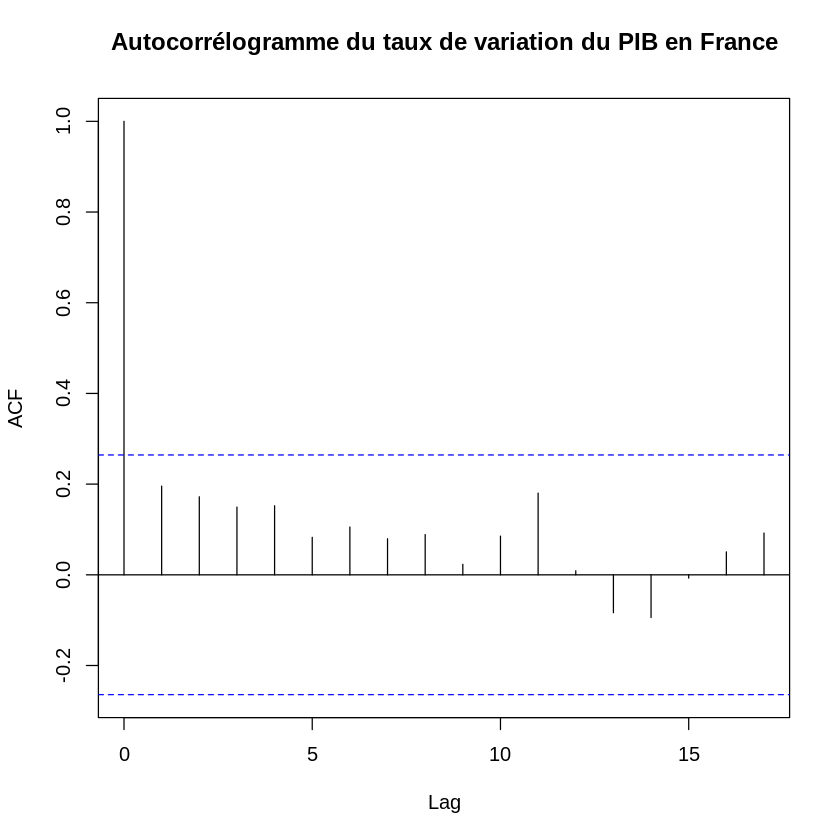

In [ ]:
acf_taux_PIB <- acf(x=PIB, main=('Autocorrélogramme du taux de variation du PIB en France'))

On remarque une très forte baisse, en un seul retard de notre taux de variation du PIB. Les valeurs d'autocorrélations du taux de croissance du PIB sont dans la zone critique, avec une autocorrélation proche de 0. Cette représentation de la fonction d'autocorrélation du taux du PIB nous montre que notre série temporelle est stationnaire.

Nous représentons maintenant l'autocorrélogramme partiel.

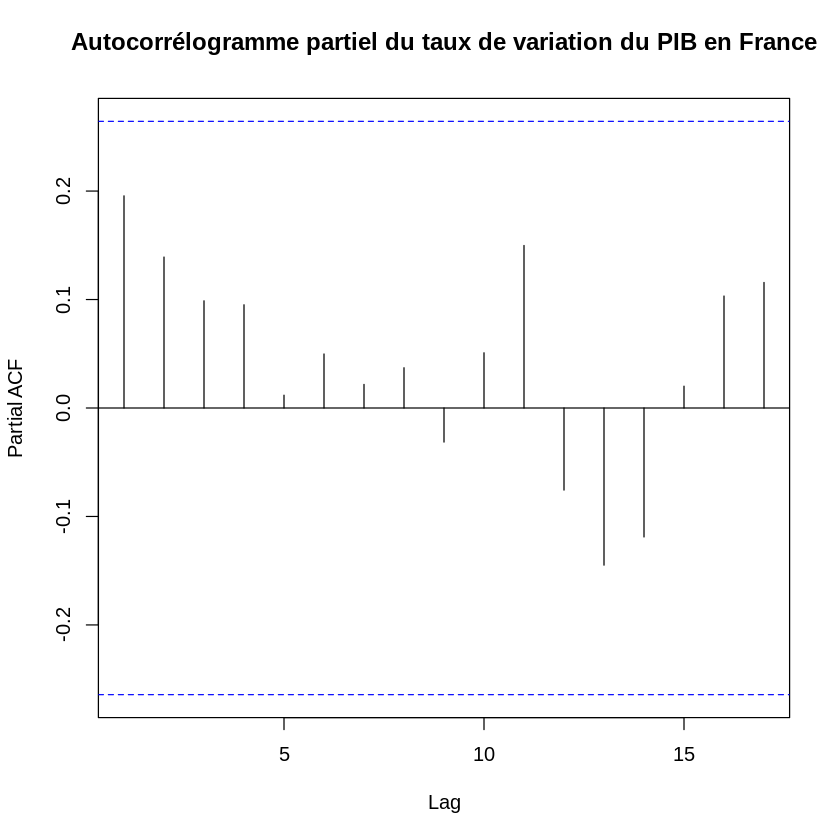

In [ ]:
pacf_taux_PIB <- pacf(x=PIB, main='Autocorrélogramme partiel du taux de variation du PIB en France')

On remarque que les valeurs sont dans la zone critique autour de 0. N'ayant aucun pic significatif, ce PACF nous confirme dans notre conclusion de stationnarité de notre série temporelle. La série temporelle semble être un modèle MA(1).

## Taux de variation du chômage en France de 1968 à 2022



Le code ci-dessous nous permet de représenter graphiquement notre séries représentant le taux de variation du chômage français de 1968 à 2022.

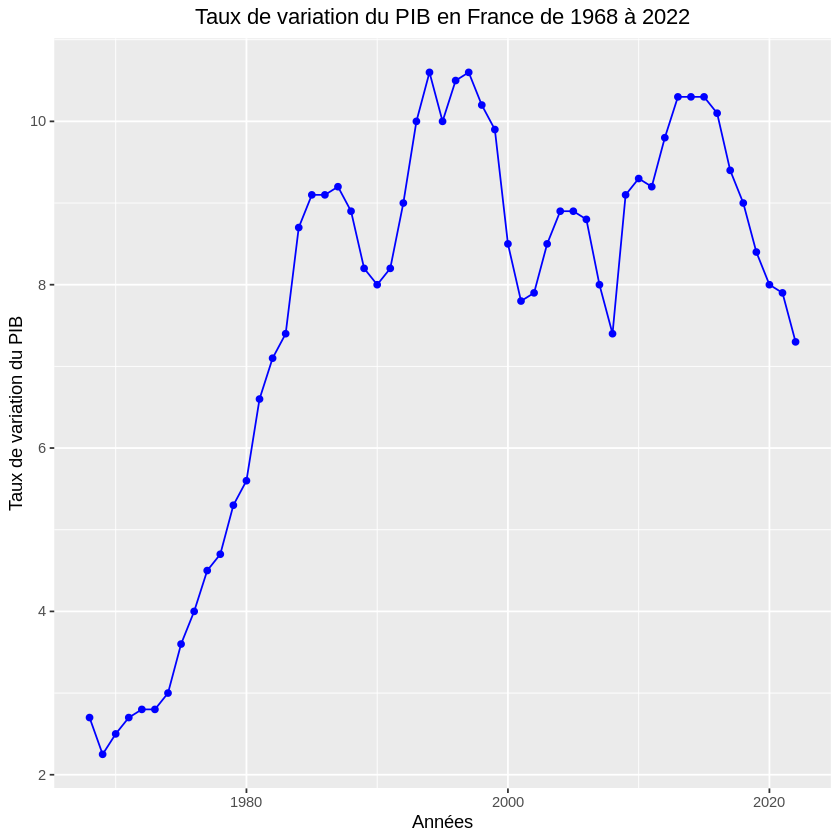

In [ ]:
p_chomage <- ggplot(data=base, aes(x = annees, y = chomage)) + geom_point(color='blue') + geom_line(color='blue') + xlab('Années') + ylab('Taux de variation du PIB') + ggtitle('Taux de variation du PIB en France de 1968 à 2022') + theme(plot.title = element_text(hjust = 0.5))
p_chomage

Nous pouvons observer que, jusqu'environ 1984, la tendance est très croissante puis fluctue jusque 2015 où nous pouvons voir par la suite que le taux de chômage tend à diminuer.

Nous distinguons 3 périodes avec des tendances différentes entre 1968 et 2022. Jusqu’à 1984, la tendance du taux de chômage est croissante, puis sur la période de 1984 à 2015, on observe de fortes variations du taux de chômage avec une tendance qui fluctue fortement. Enfin de 2015 à 2022, la tendance du taux de chômage est à la baisse.

En ce qui concerne l’espérance et la variance de cette série, on déduit également des deux graphiques qu’aucune des deux n’est constante dans le temps.

La série du taux de chômage ne semble donc pas être un processus stationnaire.

Représentons maintenant les autocorrélogrammes simples et partiels de la série. Nous commençons par l'autocorrélogramme simple.

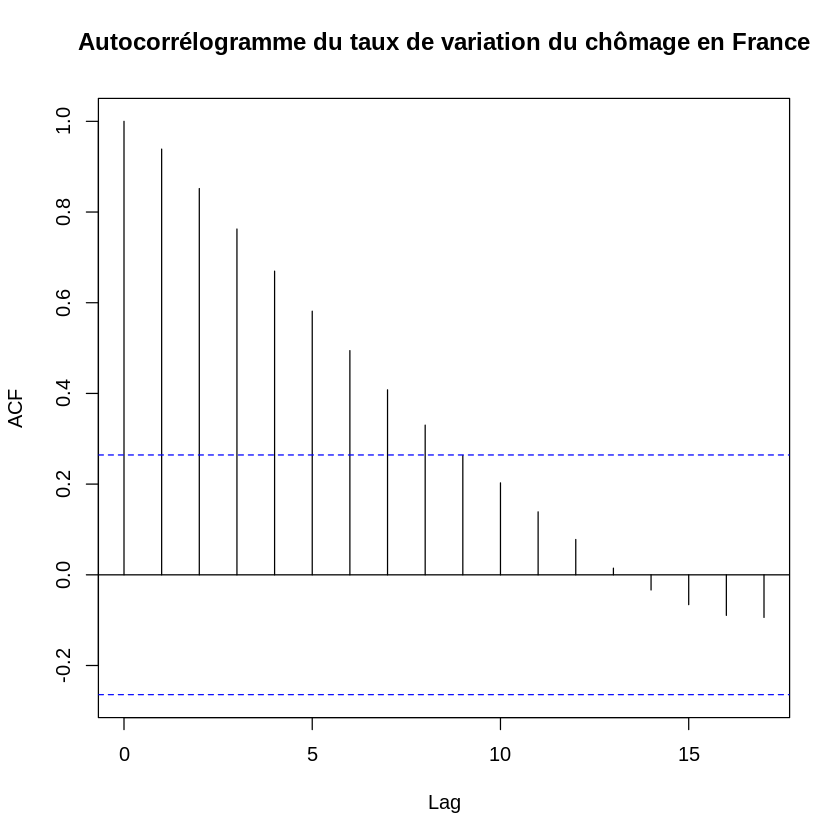

In [ ]:
acf_taux_chomage <- acf(x=chomage, main=('Autocorrélogramme du taux de variation du chômage en France'))

Nous remarquons que l'autocorrélogramme diminue lentement, lag = 9, pour atteindre la zone critique. Un autocorrélogramme qui diminue lentement peut suggérer la présence d'une tendance, soit une direction générale dans laquelle notre série évolue au fil du temps.



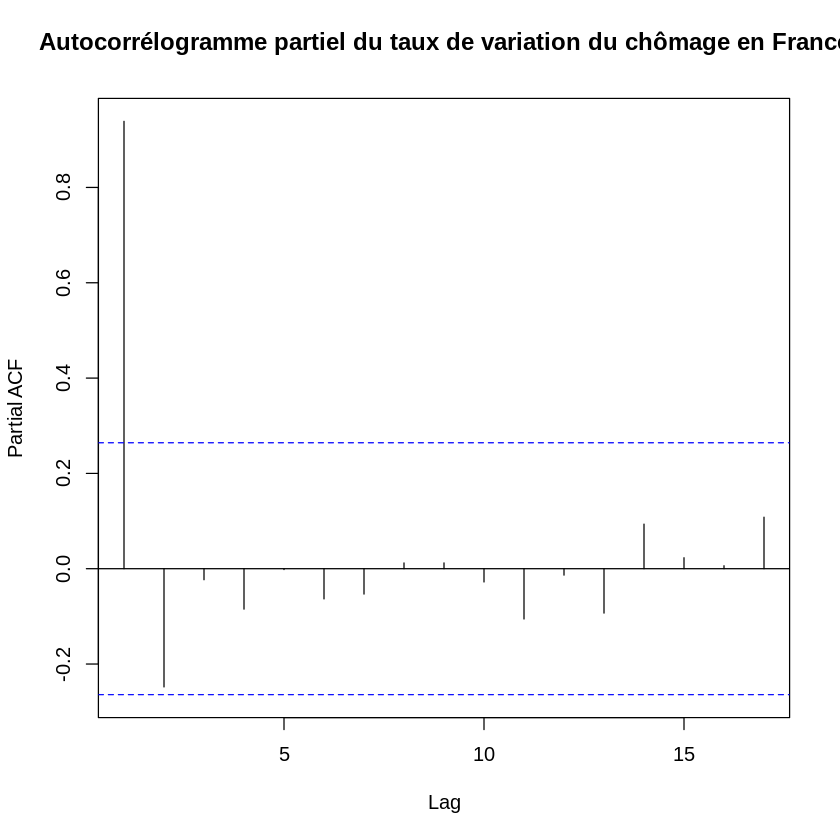

In [ ]:
pacf_taux_chomage <- pacf(x=chomage, main=('Autocorrélogramme partiel du taux de variation du chômage en France'))

L'autocorrélogramme nous montre une forte baisse juste après le premier lag. Cela est caractéristique d'un modèle AR.
L'étude de l'ACF et du PACF nous montre que la série temporelle du taux du chômage n'est pas stationnaire.
Notre série temporelle ressemble à un AR(1).

# 3. Stratégie séquentielle :

Dans cette partie, nous allons déterminer la stationnarité ou non de notre modèle en suivant une stratégie séquentielle. Pour cela, nous effectuons un test de racine unitaire, puis en fonction du résultat nous interpréterons le test de Dickey-Fuller.

Pour chaque série, on va partir du modèle le plus général (M3), modèle avec constante et tendance déterministe afin de tester la présence de racine unitaire. Dans un second temps, nous allons tester la spécification déterministe du modèle afin de déterminer si le modèle obtenu est correct ou non. Si le modèle obtenu est correct, on s'arrête. Sinon on passe à un modèle plus contraint.



## Série temporelle : variation du taux du PIB français de 1968 à 2022.



### Test ADF

Effectuons le test ADF avec constante et tendance déterministe (modèle M3). Le nombre de retard maximum est fixé à 2 et le nombre de retard optimal est déterminé par la minimisation du critère AIC. On choisit un nombre de retard égal à 2 car nous avons des données de fréquence annuelle.

In [ ]:
install.packages('urca')
library(urca)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Modèle 3 : $\Delta X_t = c + bt + ρX_{t-1} + \epsilon_t$

Nous effectuons deux tests : celui de racine unitaire de Dickey-Fuller puis le test ADF. Les deux sont effectués avec constante et tendance déterministe.


Commençons par le test de racine unitaire de Dickey-Fuller:

Les hypohtèses du test de Dickey - Fuller sont les suivantes:
$$\left\{\begin{array}{c} H0 : ρ = 0:non \, stationnarité\\ H1: ρ < 0:stationnarité\end{array}\right.$$ où $ρ = φ -1$

La statistique de test est la suivante : $t_{\hat ρ} = \frac{\hat ρ}{\hat {\sigma_{\hat ρ}}} = \frac{\hat φ -1}{\hat {\sigma_{\hat φ}}} $

On rejette le test l'hypothèse nulle, HO, si $t_{\hat ρ} < c$ où c est le quantile à l'ordre ${\alpha}$ de la table de Dickey-Fuller.

Suite à cela, nous effectuons un nouveau test.

Les hypothèses du test de spécification de la tendance déterministe sont les suivantes:

$$\left\{\begin{array}{c} H0 : b = 0 \\ H1: b ≠ 0  \end{array}\right.$$

La statistique de test est la suivante : $t_{\hat b} = \frac{\hat b}{\hat {\sigma_{\hat b}}} $

Règle de décision : Rejet de H0 si $\lvert t_{\hat b} \rvert > VC_3$ où $VC_3$ est le quantile d'ordre $1-\frac{\alpha}{2}$ de la loi de Student à T - (p + 3) degrés de liberté si nous rejettons l'hypothèse nulle du test précédent et le quantile dans la table de Dickey - Fuller si nous ne rejettons pas l'hypothèse de racine unitaire.



In [ ]:
adf1 <- ur.df(y=PIB, type=c("trend"), lag = 2, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0443 -0.7739  0.1255  1.1957  5.1786 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.48873    1.14833   3.909  0.00029 ***
z.lag.1     -1.18551    0.22238  -5.331 2.59e-06 ***
tt          -0.07001    0.02570  -2.724  0.00896 ** 
z.diff.lag   0.09812    0.15493   0.633  0.52953    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.074 on 48 degrees of freedom
Multiple R-squared:  0.546,	Adjusted R-squared:  0.5176 
F-statistic: 19.24 on 3 and 48 DF,  p-value: 2.482e-08


Value of test-statistic is: -5.3311 9.8786 14.7828 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.04 -3.45 -3.15
phi2  6.50  4.88  

Les résultats de ce test de Dickey - Fuller nous indiquent que nous rejettons l'hypothèse nulle de racine unitaire. En effet, nous avons $t_{{\hat ρ},55} = -5,331 < -3,45$. Autrement dit, ce test nous informe de la stationnarité de notre série temporelle.

Concernant le test ADF, nous observons que $\lvert t_{\hat b} \rvert = 2,724 > 1,95996$ de la table de Student. On conclut un rejet de HO, autrement dit la tendance déterministe est non nulle au seuil de 5%.

On s'arrête là et nous obtenons un modèle de type M3 tel que :

$\Delta X_t = c + bt + ρX_{t-1} + \epsilon_t$

Notre modèle est du type M3 : (Xt) ∼ I(0)+C+T, ce qui correspond à une  stationnarité, avec une constante et une tendance déterministe.




---



### Test de stationnarité KPSS

Nous allons maintenant vérifier cette stationnarité avec le test KPSS.
Dans ce test, nous inversons les hypothèses et nous avons:
$$\left\{\begin{array}{c} H0 : pas \, de \,RU \\ H1: présence \, de \, RU\end{array}\right.$$

La statistique de test est la suivante : $LM = \frac{1}{s_t^2}\frac{\sum_{t=1}^T S_t^2}{{T^2}}$ avec $S_T$ la somme des résidus de la régression de $X_t$ sur une constante et une tendance déterministe et $s_t^2$ la variance de long terme.

La règle de décision est la suivante : Rejet de H0 si LM > VC suivant la table pour le modèle M3.



In [ ]:
kpss_tau<-ur.kpss(y=PIB,type="tau",lags="short")
summary(kpss_tau)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 3 lags. 

Value of test-statistic is: 0.0932 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Nous remarquos que LM = 0,0932 < 0,146. On ne rejette pas l'hypothèse nulle H0 indiquant qu'il n'y a pas de présence de racine unitaire. Ce test confirme le résultat obtenu ultérieurement. Dans ce cas, ce test conclut également la stationnarité de notre série temporelle.

## Série temporelle : variation du taux du chômage français de 1968 à 2022.



### Test ADF
Dans cette sous partie, nous réeffectuons la même stratégie séquentielle afin de trouver le type de modèle correspondant à notre série sur les variations du taux de chômage. Commençons par le test de Dickey-Fuller et le test ADF suivant le même schéma qu'expliqué ci-dessus.

Modèle 3:

In [ ]:
adf2 <- ur.df(y=chomage, type=c("trend"), lag = 2, selectlags = c('AIC'))
summary(adf2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2220 -0.3220 -0.0687  0.1984  1.8568 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.590085   0.256011   2.305   0.0255 *
z.lag.1     -0.058974   0.044569  -1.323   0.1920  
tt          -0.002522   0.007343  -0.343   0.7328  
z.diff.lag   0.345140   0.137905   2.503   0.0158 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5165 on 48 degrees of freedom
Multiple R-squared:  0.2357,	Adjusted R-squared:  0.188 
F-statistic: 4.935 on 3 and 48 DF,  p-value: 0.004562


Value of test-statistic is: -1.3232 1.9389 2.6778 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.04 -3.45 -3.15
phi2  6.50  4.88  4.16
p

Les résultats de ce test de Dickey - Fuller nous indiquent que nous ne rejettons pas l'hypothèse nulle de racine unitaire. En effet, nous avons $t_{{\hat ρ},55} = -1,323 > -3,45$. Autrement dit, ce test nous informe que notre série temporelle n'est pas stationnaire.

Concernant le test ADF, nous observons que $\lvert t_{\hat b} \rvert = 0,343 < 3,18$. On accepte H0, autrement dit la tendance déterministe est nulle au seuil de 5%.

Nous continuons notre stratégie séquentielle en passant au modèle de type M2: $\Delta X_t = c + ρX_{t-1} + \epsilon_t$ autour d'une constance.

Nous effectuons à nouveau le test de racine unitaire avec les mêmes hypothèses, statistique de test et règle de décision que précédemment.

Nous analysons également le test de spécification de la tendance déterministe tel que les hypothèses sont:

$$\left\{\begin{array}{c} H0 : c= 0 \\ H1: c≠0 \end{array}\right.$$

La statistique de test est : $t_{\hat c} = \frac{\hat c}{\hat {\sigma_{\hat c}}} $

La règle de décision suit la condition suivante : rejet de H0 si |$t_{\hat c}$ | > VC2 avec VC2 le quantile d’ordre $1 − \frac{α}{2}$ de la loi de Student à T-(p+2) degré de liberté (ou normale si degré de liberté grand) si l'hypohtèse de racine unitaire est rejetée ou dans les tables de Dickey Fuller si l'hypohtèse de racine unitaire n'est pas rejetée.

Nous avons donc le résultat avec le code suivant :

In [ ]:
adf3<-ur.df(y = chomage,type=c("drift"), lag=2, selectlags = c('AIC'))
summary(adf3)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2012 -0.2955 -0.0723  0.1884  1.8322 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.60374    0.25062   2.409  0.01980 * 
z.lag.1     -0.07009    0.03035  -2.309  0.02517 * 
z.diff.lag   0.36214    0.12755   2.839  0.00657 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5119 on 49 degrees of freedom
Multiple R-squared:  0.2339,	Adjusted R-squared:  0.2026 
F-statistic: 7.478 on 2 and 49 DF,  p-value: 0.001464


Value of test-statistic is: -2.3095 2.9017 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86


Les résultats de ce test de Dickey - Fuller nous indiquent que nous ne rejettons pas l'hypothèse nulle de racine unitaire. En effet, nous avons $t_{{\hat ρ},55} = -2,309 > -2.89$. Autrement dit, ce test nous informe que notre série temporelle n'est pas stationnaire.

Concernant le test ADF, nous observons que $\lvert t_{\hat b} \rvert = 2.839 < 2,89$. On accepte encore une fois H0, autrement dit la constante est nulle au seuil de 5%.

Nous continuons notre stratégie séquentielle en passant au modèle de type M1: $\Delta X_t = ρX_{t-1} + \epsilon_t$.

Nous effectuons à nouveau le test de racine unitaire avec les mêmes hypothèses, statistique de test et règle de décision que précédemment.

Nous avons donc le résultat avec le code suivant :

In [ ]:
adf4<-ur.df(y = chomage,type=c("none"), lag=2, selectlags = c('AIC'))
summary(adf4)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.27607 -0.18569  0.00955  0.26175  1.94677 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
z.lag.1    -8.815e-05  9.168e-03   -0.01  0.99237   
z.diff.lag  4.102e-01  1.319e-01    3.11  0.00309 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5359 on 50 degrees of freedom
Multiple R-squared:  0.1652,	Adjusted R-squared:  0.1318 
F-statistic: 4.947 on 2 and 50 DF,  p-value: 0.01096


Value of test-statistic is: -0.0096 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


Les résultats de ce test de Dickey - Fuller nous indiquent que nous ne rejettons pas l'hypothèse nulle de racine unitaire. En effet, nous avons $t_{{\hat ρ},55} = -0.01 > -1,95$. Autrement dit, ce test nous informe que notre série temporelle n'est pas stationnaire. Nous sommes donc en présence d'un modèle du type $X_t ∼ I(1)$.



---




### Test de stationnarité KPSS

Nous allons maintenant effectuer le test de KPSS pour valider ou non notre conclusion avant de différencier notre modèle I(1) afin de le stationnariser.

In [ ]:
kpss<-ur.kpss(y=chomage, type="mu", lags="short")
summary(kpss)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.9105 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


Nous remarquos que LM = 0,9105 > 0.463. On rejette l'hypothèse nulle H0 indiquant qu'il n'y a pas de présence de racine unitaire. Dans ce cas, ce test conclut également la non stationnarité de notre série temporelle.

D'après les deux résultats précédents, notre série temporelle du taux de chômage n'est pas stationnaire. Nous allons la différencier afin de la rendre stationnaire.

In [ ]:
diff_chomage = diff(chomage)

Nous refaisons le test KPSS avec notre modèle différencié.

In [ ]:
kpss2<-ur.kpss(y=diff_chomage, type="mu", lags="short")
summary(kpss2)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.357 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


Nous remarquons donc que LM = 0,357 < 0.463. On ne rejette pas l'hypothèse nulle HO indiquant l'absence de racine unitaire. Ainsi notre modèle est maintenant un modèle stationnaire tel que $X_t ∼ I(0)$.

# 4. Modèle ARMA pour le taux de variation du PIB français

Nous allons maintenant chercher à définir le modèle ARMA correspondant à notre série temporelle portant sur le taux de variation du PIB français. Nous effectuerons des tests sur les paramètres et les résidus.

Le code suivant nous permet de trouver les p et q de notre modèle ARMA(p,q), p et q sont des entiers naturels supérieurs à 0.

In [ ]:
install.packages('forecast')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘zoo’, ‘RcppArmadillo’




In [ ]:
library(forecast)
mataic_PIB <- matrix(0,3,3)
matbic_PIB <- matrix(0,3,3)

  for (p in 0:2){
    for (q in 0:2){
      armapq <- Arima(PIB, order=c(p,0,q), method='ML')
      mataic_PIB[p+1,q+1] <- armapq$aic
      matbic_PIB[p+1,q+1] <- armapq$bic
 }
}
rownames(mataic_PIB) <- c('p=0','p=1','p=2')
rownames(matbic_PIB) <- c('p=0','p=1','p=2')
colnames(mataic_PIB) <- c('q=0','q=1','q=2')
colnames(matbic_PIB) <- c('q=0','q=1','q=2')

print(mataic_PIB)


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



         q=0      q=1      q=2
p=0 251.6507 251.9861 252.9140
p=1 251.5075 249.8668 251.7790
p=2 252.1459 251.7910 253.8239


En minimisant le critère AIC, nous retenons un modèle ARMA(1,1) pour le taux de variation du PIB.

Nous allons maintenant vérifier les conditions de ce modèle. Pour cela, nous effectuerons des tests sur les paramètres du modèles ainsi que sur les résidus.



## Tests sur les paramètres du modèle ARMA(1,1) obtenu:

Nous commençons par effectuer le test sur la significativité individuelle des coefficients.

En se basant sur l'analyse des autocorrélations, on spécifie un modèle ARMA(1,1). Le code ci-dessous nous permet d'obtenir les statistiques de notre modèle. Nous effectuons par la suite un test de significatitivité des coefficients.

In [ ]:
library(forecast)
diff_chomage <- ts(chomage, start=1969, end=2022, frequency=1)
PIB <- ts(PIB, start=1968, end=2022, frequency=1)

# Estimation d'un modèle
ARMA1<-Arima(y = PIB,order=c(1,0,1))
# Affichage de l'estimation
summary(ARMA1)

Series: PIB 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1    mean
      0.9504  -0.8112  2.5603
s.e.  0.0769   0.1241  0.9260

sigma^2 = 4.99:  log likelihood = -120.93
AIC=249.87   AICc=250.67   BIC=257.9

Training set error measures:
                     ME     RMSE      MAE      MPE     MAPE      MASE
Training set -0.2351557 2.172039 1.377133 -12.8059 88.40737 0.8037346
                    ACF1
Training set -0.04526616

In [ ]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




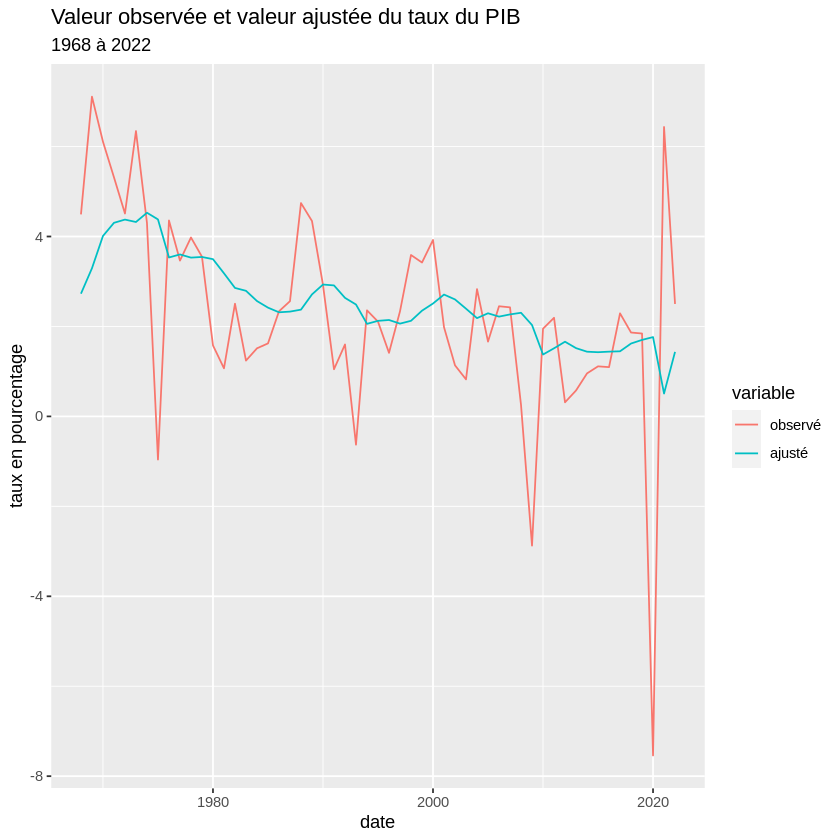

In [ ]:
library(ggplot2)
library(reshape2)

df_plot<-data.frame(annees,PIB,F=as.matrix(ARMA1$fitted))
colnames(df_plot)<-c("date","observé","ajusté")

data_melt=melt(as.data.frame(df_plot),id.vars = 1)

p_PIB<-ggplot(data=data_melt,aes(x=date))+geom_line(aes(x=date,y=value,color= variable))
p_PIB+labs(y="taux en pourcentage",title = "Valeur observée et valeur ajustée du taux du PIB",
            subtitle = "1968 à 2022")

On remarque que le graphique ajusté suit le graphique observé avec un peu de retard. Nous observons que la courbe concernant aux données ajustées varient de la même manière que le taux du PIB observé. Cependant, les variations sont beaucoup moins importantes.

### Test de significativité

Le test de significativité est le suivant :

Les hypothèses de test sont:
$$\left\lbrace\begin{array}{l} H_{0}\,:\,φ_i=0\\
H_{a}\,:\,φ_i \neq 0
\end{array} \right.$$

La statistique de test est:
$$\hat t = \frac{\hat φ}{\hat \sigma_{\hat φ_i}} ∼ St(T- K)$$ sous HO, avec T le nombre d'observation et K le nombre de paramètre estimé.

La règle de décision est $$\left| t_{\hat φ_i} \right| > u_{1-\alpha /2}$$ ou p-value $< \alpha$, on rejette H0.

In [ ]:
library(lmtest)
coeftest(ARMA1)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





z test of coefficients:

           Estimate Std. Error z value  Pr(>|z|)    
ar1        0.950351   0.076912 12.3563 < 2.2e-16 ***
ma1       -0.811250   0.124066 -6.5388 6.199e-11 ***
intercept  2.560304   0.925992  2.7649  0.005693 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Ce test nous indique que nos variables ar1 et ma1 sont significatives au seuil 1% et la moyenne "intercept" est significative à 10%.

Nous pouvons donc interpréter nos résultats, notre modèle peut s'écrire comme suit:

$$
\left\lbrace
\begin{array}{l}
FR\_PIB_{t} = constante+\hat{u}_{t}\\
\hat{u}_{t}=0.950351\times \hat{u}_{t-1}-0.811250\times \hat{\epsilon_{t-1}} +\hat{\epsilon}_{t}
\end{array}
\right.
$$

Le résultat intercept correspond à la moyenne de notre série ARMA(1,1). Pour retrouver la constante, nous utilisions la formule suivante: $$cst = \frac{mean}{1 - ϕ_1 - θ_1} <=> cst = \frac{2.560304}{1 - 0.950351 + 0.811250} = \frac{2.560304}{0.860899} = 2.97399 $$

Nous ne pouvons cependant pas interpréter la significativité de la constante.

Le modèle estimé est donc :
$$
\left\lbrace
\begin{array}{l}
FR\_PIB_{t} = 2.97399+\hat{u}_{t}\\
\hat{u}_{t}=0.950351\times \hat{u}_{t-1}-0.811250\times \hat{\epsilon_{t-1}} +\hat{\epsilon}_{t}
\end{array}
\right.
$$

### La stationnarité du modèle

Analysons maintenant les racines de notre modèle. Pour cela, nous représentons les racines du modèle dans le cercle trigonométrique. Il faut que l'inverse des racines, représentées par des points se situent à l'intérieur de ce cercle.

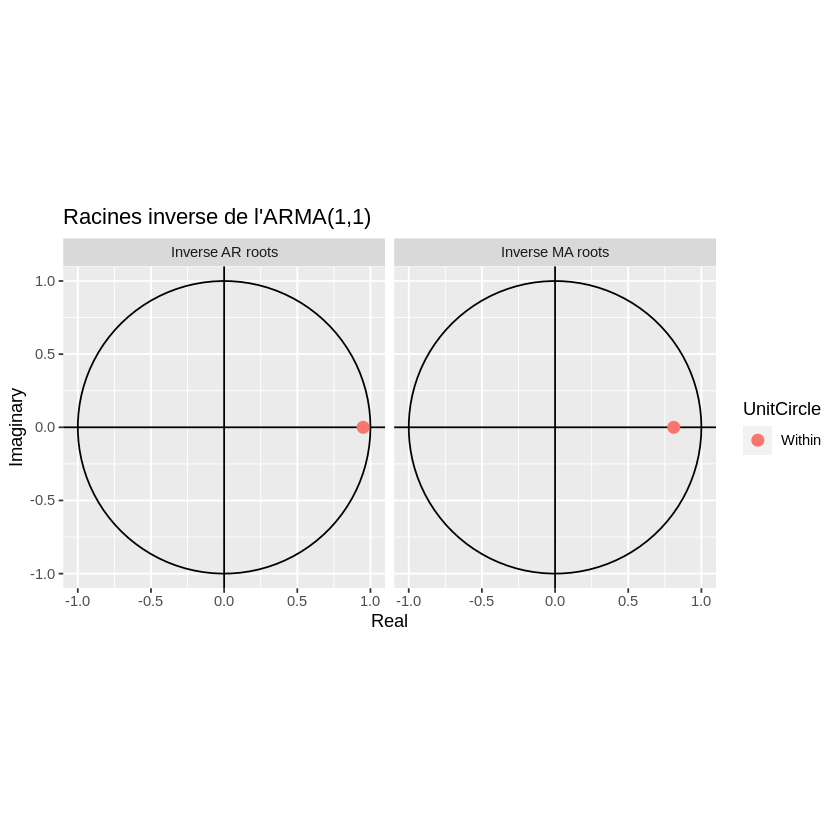

In [ ]:
autoplot(ARMA1,main="Racines inverse de l\'ARMA(1,1)")

On remarque que les inverses des racines se situent à l'intérieur du cercle, ainsi cela confirme la condition de stationnarité.

## Test sur les résidus


### Test d'absence d'autocorrélation de Ljung Box
Nous allons maintenant effectuer les tests sur les résidus en commençant par le test d’absence d’autocorrélation de Ljung Box. Ce test est utilisé pour évaluer si les résidus d'un modèle de série temporelle présentent une autocorrélation significative à différents retards.

Pour cela, les hypothèses sont :
$$\left\lbrace\begin{array}{l} H0\,:\,ρ_1 = ρ_2 = ... = ρ_H =0\\
H1 : \exists j \in \{1,...,H\} \, tel \, que \,  ρ_j ≠ 0\end{array} \right.$$

La statistique de Ljung Box est donnée par:
$$LB(H) = T(T+2)\sum_{h=1}^H\frac{\hat ρ_h^2}{T-h} ∼ \chi^2(H-k)$$ sous l'hypothèse nulle H0 avec k est le nombre de paramètres du modèle.

La règle de décision est telle que nous rejettons HO au seuil $\alpha$ si $$LB(H)>\chi_{H-k,1-\alpha}$$ ou p-value < $\alpha$.




	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with non-zero mean
Q* = 1.2653, df = 8, p-value = 0.996

Model df: 2.   Total lags used: 10



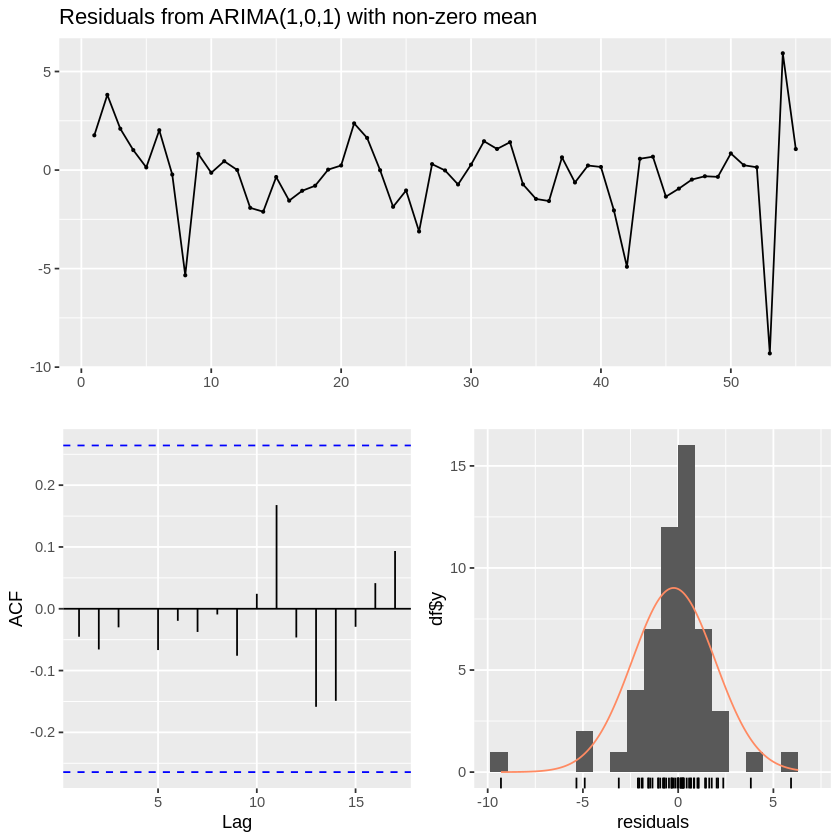

In [ ]:
checkresiduals(ARMA1,lags=10)

Nous remarquons  une p-value = 0,996 > 5%. On ne rejette pas l'hypohtèse nulle d'absence d'autocorrélation des résidus.
D'après ce test, notre modèle ne présente pas d'autocorrélation des résidus. De plus, ce test nous indique 2 retards.

L'autocorrélogramme nous indique que toutes les autocorrélations se situent dans les bornes de l'intervalle de confiance à 95%. La statistique de test est égale à Q* = 1,2653.


---



### Test de normalité des résidus de Jarque Bera
Nous effectuons maintenant le test de l'hypothèse de normalité des résidus.

Avant d'effectuer le test, nous pouvons afficher l'histogramme des résidus accompagné de la loi normale avec la même moyenne et le même écart type que les résidus (en rouge).


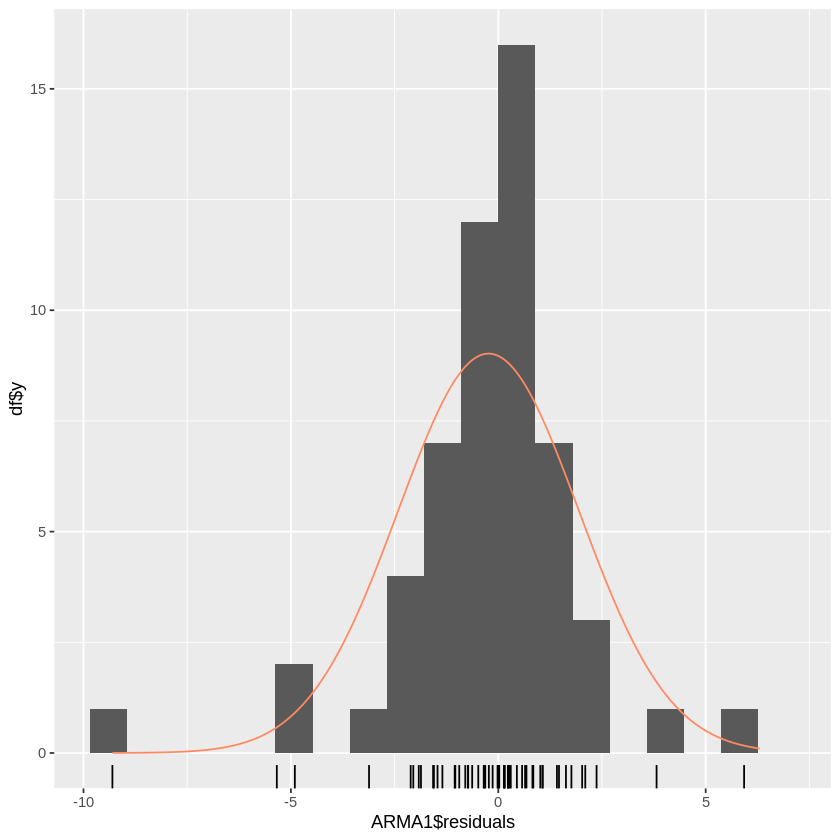

In [ ]:
gghistogram(ARMA1$residuals, add.normal = TRUE)

Cet histogramme est décalé vers le droite par rapport à la loi normale centrée réduite. On peut d'ors et déjà supposer que nos résidus ne suivent pas une loi normale. Cela semble parvenir du fait des valeurs extrêmes de nos résidus que nous pouvons voir à droite et à gauche de la figure principale sur cet histogramme.

Suite à cela, nous pouvons analyser le skewness ainsi que le kurtosis.

In [ ]:
install.packages('moments')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(moments)
sprintf("Skewness des residus : %f",skewness(ARMA1$residuals))
sprintf("Kurtosis des residus : %f",kurtosis(ARMA1$residuals))

[1] "Skewness des residus : -1.188217"

[1] "kurtosis des residus : 8.283636"

On trouve une valeur inférieur à 0 pour le skewness. Cela signifie que la distribution est étalée vers la gauche. De plus, comme le kurtosis est strictement supérieur à 3, cela signifie la probabilité d’apparition de valeurs extrêmes pour notre série est plus importante que dans le cas d’une loi normale.

La supposition de non suivi d'une loi normale par les résidus de notre série temporelle semble se confirmer. Vérifions ce résultat avec le test de Jarque Bera.

Nous effectuons le test de Jarque Bera.
Sous l'hypothèse nulle, HO, les résidus $\epsilon_t$ suivent une loi normale.

La statistique de test est la suivante:
$$JB = \frac{T-k}{6}*[\hat S^2 + \frac{1}{4}(\hat K - 3)^2] ∼ \chi^2(2)$$ sous l'hypothèse nulle HO.

Nous décidons de rejetter HO au seuil $\alpha$ si $JB > \chi_{2,1-\alpha}$ ou si la p-value < $\alpha$.


In [ ]:
install.packages("tseries")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tseries)
jarque.bera.test(ARMA1$residuals)


	Jarque Bera Test

data:  ARMA1$residuals
X-squared = 76.918, df = 2, p-value < 2.2e-16


On remarque que X-square = JB = 76.918 > $\chi^{2}_{0.95}(2)=5.99$ pour un risque de première espèce de 5%. Nous rejettons l'hypothèse d'une loi normale pour nos résidus. Cela peut s'expliquer par nos valeurs extrêmes introduites au début du projet et que nous pouvons retrouver aux extrêmités de l'histogramme ci-dessus. De plus, cela peut expliquer les valeurs du skewness et du kurtosis.


---



### Valeurs indicatrices

**a. Suppression des données**

Dans cette sous partie, nous décidons de supprimer les données dont les résidus sont les plus extremes de notre modèle afin de comparer avec notre modèle avec indicatrice. Nous allons tout d'abord rechercher nos valeurs extrêmes pour pouvoir les étudier par la suite et refaire le test de Jarque Bera sans ces valeurs.

In [ ]:
cat("Les valeurs inférieures à -4 sont :", which(-4>ARMA1$residuals), "\n")
cat("Les valeurs supérieures à 4 sont :", which(4<ARMA1$residuals), "\n")

Les valeurs inférieures à -4 sont : 8 42 53 
Les valeurs supérieures à 4 sont : 54 


Nous pouvons maintenant représenter l'histogramme des résidus de notre modèle sans ces valeurs extrêmes.

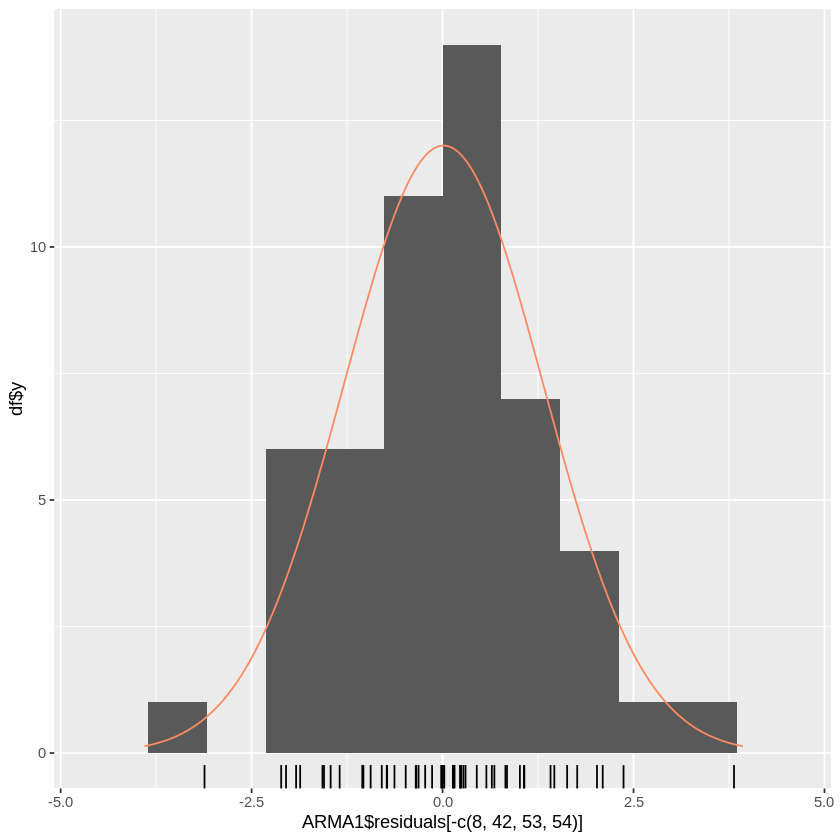

In [ ]:
gghistogram(ARMA1$residuals[-c(8,42,53,54)], add.normal = TRUE)

Nous remarquons que l'histogramme ce centre vers la courbe de la loi normale afficher en orange. Nous effectuons une nouvelle fois le test de Jarque Bera pour valider le fait que nos résidus suivent maintenant une loi normale.

In [ ]:
jarque.bera.test(ARMA1$residuals[-c(8,42,53,54)])


	Jarque Bera Test

data:  ARMA1$residuals[-c(8, 42, 53, 54)]
X-squared = 0.83221, df = 2, p-value = 0.6596


En supprimant les valeurs aux positions 8, 42, 53 et 54 (valeurs correspondant aux valeurs extrêmes), nous obtenons le résultat que les résidus suivent une loi normale d'après le test de Jarque Bera. En effet, X-square = JB = 0.83221 < $\chi^{2}_{0.95}(2)=5.99$ pour un risque de première espèce de 5% ainsi que p-value = 0,6596 > 0,05; nous ne rejetons donc pas l'hypothèse nulle H0.

**b. Modèle avec indicatrices**

Dans cette sous partie, nous allons estimer un modèle avec indicatrices. La partie précédente nous permet de valider nos résultats.

Pour construire le modèle avec indicatrices, nous réutilisons un code précédent afin de trouver les valeurs extrêmes des résidus.

In [ ]:
# Créer un vecteur de dates avec uniquement l'année correspondant à chaque numéro de colonne
annees <- as.Date(paste0(base$annees, "-01-01"))

# Remplacer la colonne existante "annees" par le nouveau vecteur de dates
base$annees <- annees

# Récupération de la date associée à nos valeurs extrêmes
base$annees[8]
base$annees[42]
base$annees[53]
base$annees[54]

[1] "1975-01-01"

[1] "2009-01-01"

[1] "2020-01-01"

[1] "2021-01-01"

In [ ]:
# Création de nouvelles colonnes, dans notre base de données, correspondant à nos indicatrices
base$DUM1 <- as.numeric(annees=="1975-01-01")
base$DUM2 <- as.numeric(annees=="2009-01-01")
base$DUM3 <- as.numeric(annees=="2020-01-01")
base$DUM4 <- as.numeric(annees=="2021-01-01")

# Estimation du modèle ARMA avec notre modèle indicatrice
ARMA1_1DUM<-Arima(y = PIB[1:length(PIB)],order=c(1,0,1),
                   xreg=as.matrix(base[1:length(PIB),c("DUM1","DUM2","DUM3","DUM4")]))
ARMA1_1DUM

Series: PIB[1:length(PIB)] 
Regression with ARIMA(1,0,1) errors 

Coefficients:
         ar1      ma1  intercept     DUM1     DUM2     DUM3    DUM4
      0.8259  -0.2141     2.7343  -5.3228  -4.2399  -9.6622  4.1344
s.e.  0.1170   0.2071     0.6324   0.9319   0.9377   1.0045  1.0115

sigma^2 = 1.367:  log likelihood = -83.3
AIC=182.59   AICc=185.72   BIC=198.65

In [ ]:
library(lmtest)
coeftest(ARMA1_1DUM)


z test of coefficients:

          Estimate Std. Error z value  Pr(>|z|)    
ar1        0.82593    0.11701  7.0586 1.682e-12 ***
ma1       -0.21406    0.20709 -1.0337    0.3013    
intercept  2.73428    0.63241  4.3236 1.535e-05 ***
DUM1      -5.32284    0.93190 -5.7118 1.118e-08 ***
DUM2      -4.23992    0.93772 -4.5215 6.140e-06 ***
DUM3      -9.66217    1.00453 -9.6186 < 2.2e-16 ***
DUM4       4.13444    1.01149  4.0875 4.361e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Le modèle avec indicatrices est tel que le coefficient ar1 est significatif à 0,1%, les indicatrices DUM1, DUM2, DUM3 et DUM4 sont aussi significatifs à 0,1%. C'est également le cas de la constante.

En présence de ces indicatrices, nous remarquons que notre modèle devient un modèle AR(1). En effet, le coefficient ma1 n'est plus significatif.

Le modèle peut s'écrire comme suit:

$$
\left\lbrace
\begin{array}{l}
FR\_PIB_{t} = 2.73428+\hat{u}_{t}\\
\hat{u}_{t}=-0.21406\times \hat{u}_{t-1} -5.32284*1_{(-4>ARMA1$residuals(8)>4)} - 4.23992 * 1_{(-4>ARMA1$residuals(42)>4)} - 9.66217*1_{(-4>ARMA1$residuals(53)>4)} + 4.13444*1_{(-4>ARMA1$residuals(42)>4)} +\hat{\epsilon}_{t}
\end{array}
\right.
$$

Nous pouvons maintenant effectuer le test de normalité des résidus de Jarque Bera avec le modèle indicatrices.

In [ ]:
library(tseries)
jarque.bera.test(ARMA1_1DUM$residuals)


	Jarque Bera Test

data:  ARMA1_1DUM$residuals
X-squared = 1.0347, df = 2, p-value = 0.5961


Le test de Jarque Bera nous informe que la p-value = 59,61% > 0,5%. De plus, JB = 1,0347 < $\chi^{2}_{0.95}(2)=5.99$ pour un risque de première espèce de 5%. Nous ne rejetons pas l'hypothèse nulle. Avec le modèle indicatrice, nos résidus suivent une loi normale


	Ljung-Box test

data:  Residuals from Regression with ARIMA(1,0,1) errors
Q* = 10.897, df = 8, p-value = 0.2076

Model df: 2.   Total lags used: 10



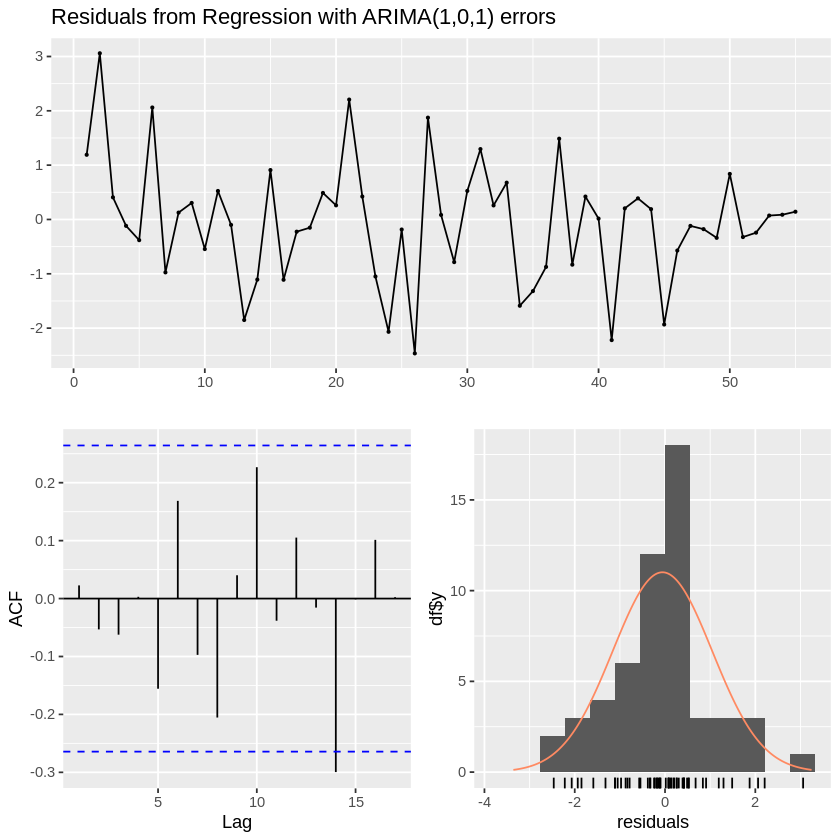

In [ ]:
checkresiduals(ARMA1_1DUM,lags=10)

In [ ]:
mean(ARMA1_1DUM$residuals)

[1] -0.05682022

Les résidus, comme nous pouvons voir sur le graphique, fluctuent autour de leur moyenne proche de 0. Nos résidus suivent une loi normale

In [ ]:
sprintf("Skewness des residus : %f",skewness(ARMA1_1DUM$residuals))
sprintf("Kurtosis des residus : %f",kurtosis(ARMA1_1DUM$residuals))

[1] "Skewness des residus : 0.193002"

[1] "kurtosis des residus : 3.549993"

On trouve une valeur supérieure à 0 mais proche de ce dernier pour le skewness. Cela signifie que la distribution, suite à la mise en place de valeurs indicatrices, s'est centrée en étant un peu décalé vers la droite.
De plus, le kurtosis s'est également rapproché de 3. La probabilité d'apparition de valeurs extrêmes est faible et se rapproche du cas d'une loi normale.

Ces résultats valident les résultats précédents obtenus aux différents tests.

### Test d'Engle Granger d'effet ARCH
Nous pouvons maintenant effectuer le test d'Engle Granger d'absence d'effet ARCH. Pour cela, nous allons déterminer le nombre de retard.

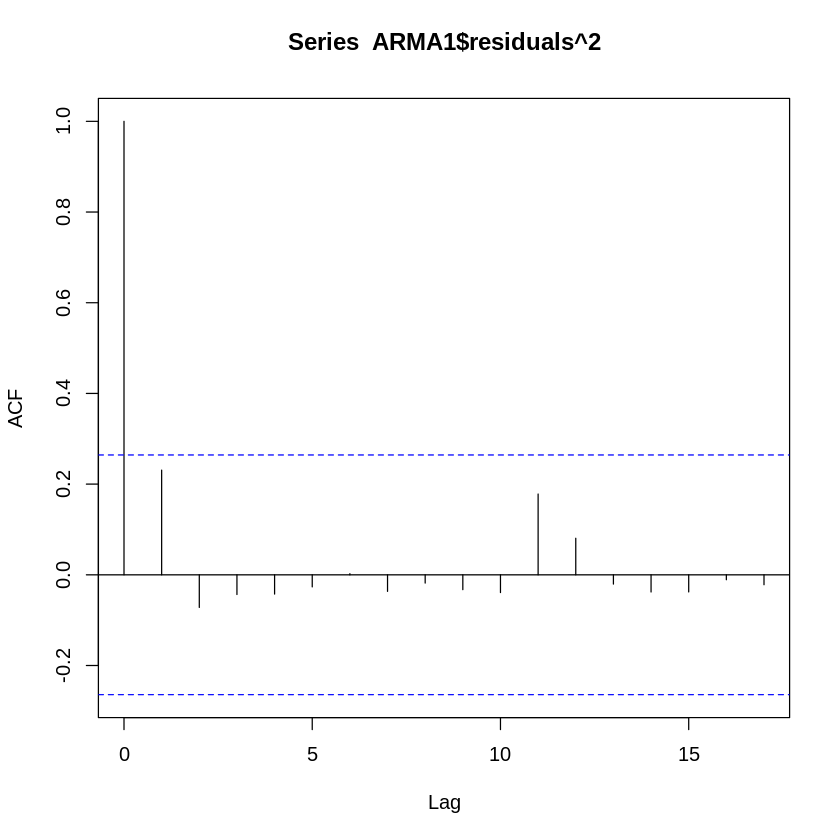

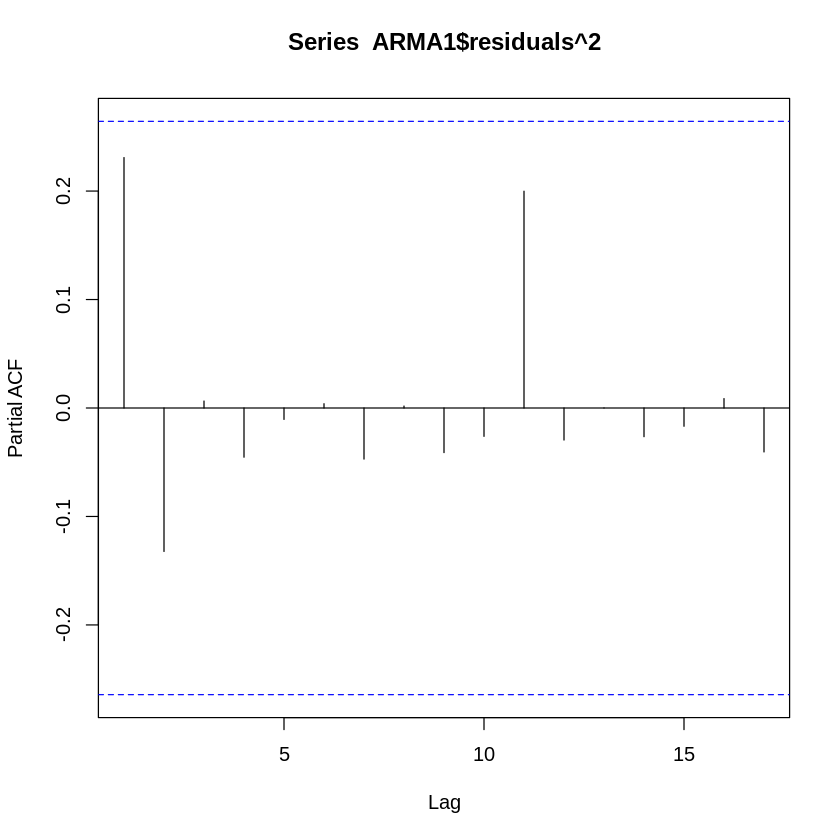

In [ ]:
acf(ARMA1$residuals^2)
pacf(ARMA1$residuals^2)

On remarque uniquement que la première est significative; on choisit alors 2 retards.

La régression estimée est :

$$
\hat{\epsilon}_{t}^{2}= \gamma_{0} + \gamma_{1} \hat{\epsilon}_{t-1}^{2} +\gamma_{2} \hat{\epsilon}_{t-2}^{2} + v_{t}
$$


Les hypothèses du test sont :
$$
\left\{
\begin{array}{ll}
H_{0} : \gamma_{1}=\gamma_{2}=0 \Rightarrow \,pas\,d'effet\,ARCH\\
H_{a} : \gamma_{1}\neq 0\, ou \, \gamma_{2} \neq 0 \Rightarrow effet\,ARCH
\end{array}
\right.
$$

La statistique de test correspond au multiplicateur de Lagrange:
$$LM = T' R^2 \rightarrow \chi^2_p \quad \text{avec } T' = T - p$$

On décide de rejeter H0 au seuil $\alpha$ lorsque LM > $\chi^2_{p;1-\alpha}$



In [ ]:
install.packages('FinTS')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(FinTS)
ArchTest(ARMA1$residuals,lags=2,demean = FALSE)


Attaching package: ‘FinTS’


The following object is masked from ‘package:forecast’:

    Acf





	ARCH LM-test; Null hypothesis: no ARCH effects

data:  ARMA1$residuals
Chi-squared = 3.9644, df = 2, p-value = 0.1378


La statistique de test LM = 3.9644 < 5,991. On ne rejette pas l'hypothèse nulle. Notre modèle est en présence d'effet d'ARCH. Un effet ARCH sur les résidus signifie que la variance des résidus n'est pas constante, mais plutôt qu'elle varie avec le temps.

## Prévisions de la série modélisée sur les horizons de 1 à 3

Les prévisions économétriques sont un outil essentiel pour anticiper les tendances futures, prendre des décisions éclairées et élaborer des stratégies efficaces dans divers domaines. Cela permet d'atténuer les incertitudes et d'améliorer la gestion et la planification, contribuant ainsi à la réussite d'un projet d'économétrie. Ainsi on va chercher l'espérance conditionnelle de notre série conditionnellement à l'ensemble d'information disponible.

Nous effectuons les prévisions sur notre série modélisée pour les horizons de 1 à 3.

In [ ]:
library(forecast)
forecast_ARMA1<-forecast(ARMA1,h=3,level=95)
forecast_ARMA1

     Point Forecast     Lo 95    Hi 95
2023       1.639001 -2.739196 6.017198
2024       1.684743 -2.735609 6.105095
2025       1.728213 -2.729868 6.186295

Nous remarquons que notre modèle ARMA1 estime des valeurs positives pour les années suivantes. Ainsi le PIB devrait augmenter sur les 3 années à venir. Les intervalles de confiance varient entre -2,7 et 6.

Les prévisions aux années 2023, 2024, et 2025 valent respectivement 1.639, 1.685 et 1.729. Ainsi le taux du PIB aura tendance à augmenter dans les trois années suivantes.

Le modèle obtenue est:
$$
\left\lbrace
\begin{array}{l}
PIB_{t} = 2.97399+\hat{u}_{t}\\
\hat{u}_{t}=0.950351\times \hat{u}_{t-1}-0.811250\times \hat{\epsilon_{t-1}} +\hat{\epsilon}_{t}
\end{array}
\right.
$$

$$ =>
\left\lbrace
\begin{array}{l}
\hat{u}_{t} = PIB_{t} - 2.97399\\
PIB_{t} - 2.97399 = 0.950351\times (PIB_{t-1} - 2.97399) -0.811250\times \hat{\epsilon_{t-1}} +\hat{\epsilon}_{t}
\end{array}
\right.
$$



$$ =>
\begin{array}{l}
PIB_{t} - 2.97399 = 0.950351\times (PIB_{t-1} - 2.97399) -0.811250\times \hat{\epsilon_{t-1}} +\hat{\epsilon}_{t}
\end{array}.
$$

$$ =>
\begin{array}{l}
PIB_{t} = 0.14766 + 0.950351\times PIB_{t-1} -0.811250\times \hat{\epsilon_{t-1}} +\hat{\epsilon}_{t}
\end{array}.
$$


**Prévision sur horizon de 1, h=1 :**

$$
\begin{equation}
\begin{aligned}
    \hat{PIB}_{T}(1) &= E(PIB_{T+1} | PIB_T) \\
    &= E( cst + \phi_1 PIB_T +  \theta_1 \epsilon_{T} + \epsilon_{T+1} | PIB_T) \\
    &= cst + \phi_1 E(PIB_T | PIB_T) + \theta_1 E(\epsilon_{T}|PIB_T) +  E(\epsilon_{T+1}|PIB_T) \\
    &= cst + \phi_1 PIB_T \\
\end{aligned}
\end{equation}$$


**Prévision sur horizon de 2, h=2 :**

$$
\begin{equation}
\begin{aligned}
    \hat{PIB}_{T}(2) &= E(PIB_{T+2} | PIB_T) \\
    &= E( cst + \phi_1 PIB_{T+1} +  \theta_1 \epsilon_{T+1} + \epsilon_{T+2} | PIB_T) \\
    &= cst + \phi_1 E(PIB_{T+1} | PIB_T) + \theta_1 E(\epsilon_{T+1}|PIB_T) +  E(\epsilon_{T+2}|PIB_T) \\
    &= cst + \phi_1 PIB_T(1) \\
\end{aligned}
\end{equation}$$

**Prévision sur horizon de 3, h=3 :**

$$
\begin{equation}
\begin{aligned}
    \hat{PIB}_{T}(3) &= E(PIB_{T+3} | PIB_T) \\
    &= E( cst + \phi_1 PIB_{T+2} +  \theta_1 \epsilon_{T+2} + \epsilon_{T+3} | PIB_T) \\
    &= cst + \phi_1 E(PIB_{T+2} | PIB_T) + \theta_1 E(\epsilon_{T+2}|PIB_T) +  E(\epsilon_{T+3}|PIB_T) \\
    &= cst + \phi_1 PIB_T(2) \\
\end{aligned}
\end{equation}$$

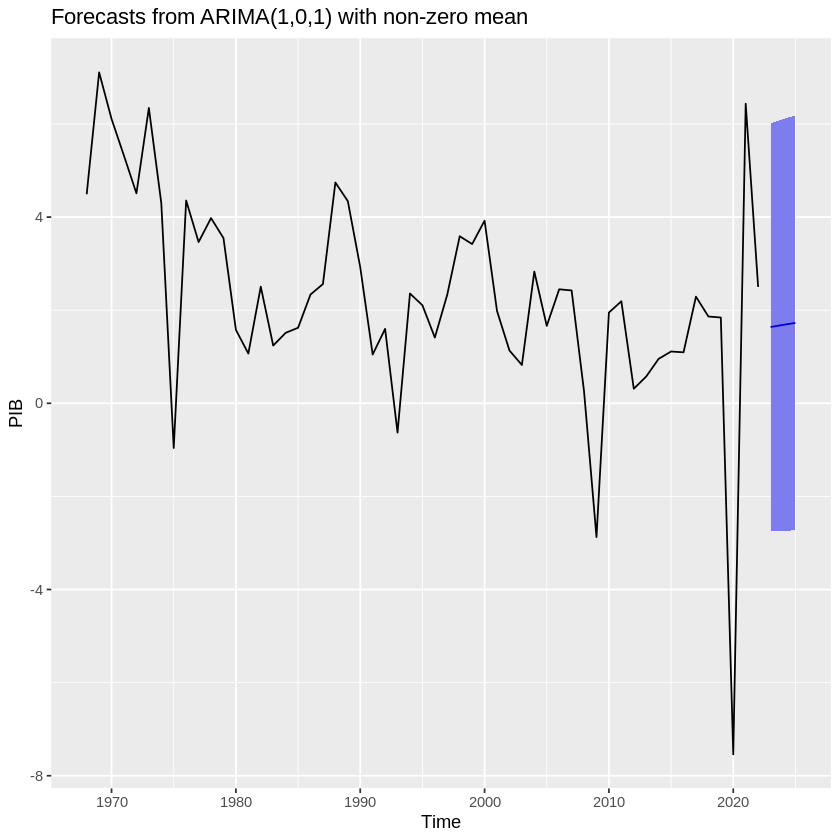

In [ ]:
autoplot(forecast_ARMA1)

Les lignes bleues représentent les prévisions du modèle, avec les bandes de confiance de 95 %. Les bandes de confiance indiquent la probabilité que la valeur réelle se situe dans la bande.

Sur le graphique, nous pouvons voir que les prévisions sont positives à court terme, puis deviennent négatives à long terme. Les bandes de confiance sont larges, ce qui signifie qu'il y a une grande incertitude sur les prévisions à long terme.


Nous effectuons également les prévisions sur notre série de départ (taux de variation du PIB) pour les horizons 1 à 3.

     Point Forecast     Lo 95    Hi 95
2023       1.389454 -2.636571 5.415478
2024       1.387282 -2.638743 5.413306
2025       1.385313 -2.640712 5.411338

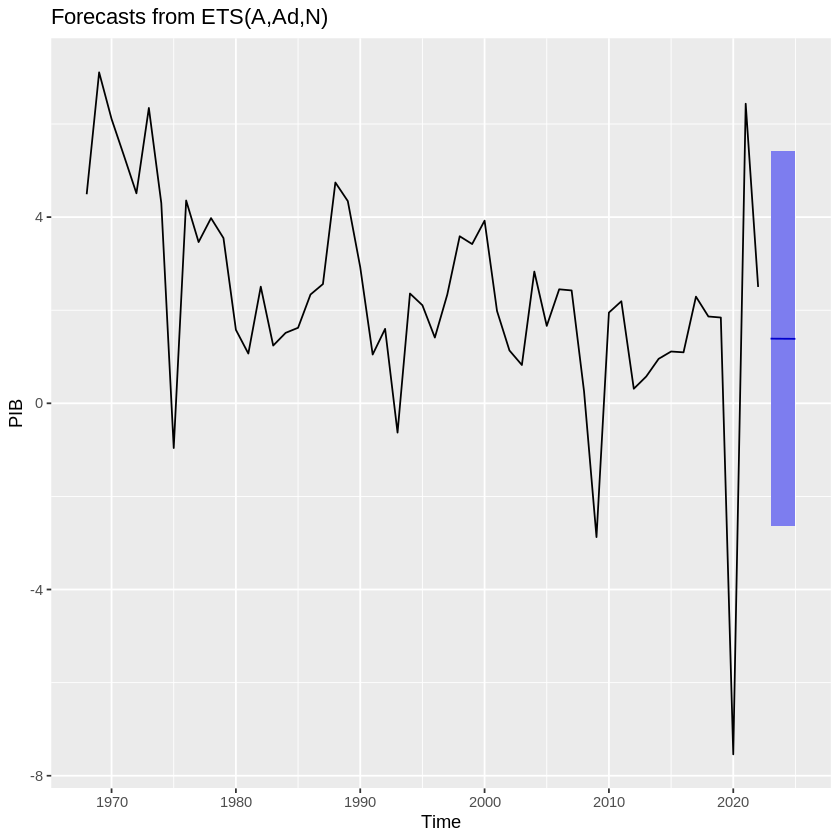

In [ ]:
forecast_PIB<-forecast(PIB,h=3,level=95)
forecast_PIB
autoplot(forecast_PIB)

La partie bleue nous donne l'intervalle dans lequel le taux de variation du PIB devrait se trouver dans les 3 prochaines années au seuil de 95%. Ce graphique nous indique donc que le PIB est susceptible d'augmenter légèrement d'ici trois ans. L'intervalle de confiance est plus petit que pour l'ARMA1 dont les bornes varient autour de -2,7 et 6.

# Modélisation multivariée

L'objectif de cette partie est de modéliser plusieurs variables stationnaires en fonction de leur dynamique passée. Le but, dans notre cas, va être de capturer les interdépendances de nos deux séries temporelles.


## Estimation du modèle VAR
Nous commençons par mettre, en time series, le taux de croissance du chômage (diff_chomage) et le taux de croissance du PIB (PIB).

In [ ]:
install.packages('vars')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘strucchange’, ‘sandwich’




In [ ]:
diff_chomage<-ts(diff_chomage,start=1969,end=2022,frequency=1) #Nous perdons une observation à cause de la différenciation
TX_de_croissancePIB<-ts(base$taux_PIB,start=1968,end=2022,frequency=1)

#concaténation des 2 séries sur une plage temporelle commune
endogen<-ts.intersect(diff_chomage,TX_de_croissancePIB)

#Choix du nb de retards avec les critères d'information
library(vars)
pselect<-VARselect(y=endogen,lag.max=2,type="both") #Le choix de 2 retards provient du fait
#que nous sommes en données annuelles

#affichage des valeurs des critères de sélection
pselect$criteria

# nombre de retards optimal selon les critères de sélection
pselect$selection

,1,2
AIC(n),0.1882860,-0.05372422
HQ(n),0.3033723,0.11890519
SC(n),0.4884774,0.39656279
FPE(n),1.2079142,0.94965221


AIC(n)  HQ(n)  SC(n) FPE(n) 
     2      2      2      2

Les différents critères de sélection du nombre de retard nous indiquent que nous devons utiliser 1 retard.

Nous allons maintenant estimer le modèle VAR(2).

In [ ]:
VAR1 <-VAR(y = endogen,type="const",lag.max = 2)
summary(VAR1)


VAR Estimation Results:
Endogenous variables: diff_chomage, TX_de_croissancePIB 
Deterministic variables: const 
Sample size: 52 
Log Likelihood: -140.556 
Roots of the characteristic polynomial:
0.8941 0.4515 0.4515 0.3245
Call:
VAR(y = endogen, type = "const", lag.max = 2)


Estimation results for equation diff_chomage: 
diff_chomage = diff_chomage.l1 + TX_de_croissancePIB.l1 + diff_chomage.l2 + TX_de_croissancePIB.l2 + const 

                       Estimate Std. Error t value Pr(>|t|)    
diff_chomage.l1         1.18240    0.12450   9.497 1.65e-12 ***
TX_de_croissancePIB.l1 -0.09768    0.02913  -3.353  0.00159 ** 
diff_chomage.l2        -0.30858    0.11580  -2.665  0.01053 *  
TX_de_croissancePIB.l2 -0.06536    0.03237  -2.019  0.04919 *  
const                   1.40810    0.29914   4.707 2.25e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.4446 on 47 degrees of freedom
Multiple R-Squared: 0.9677,	Adjusted R-squared: 0.965 


Les équations obtenues sont les suivantes:
$$ diffchomage_{t} = 1.4081 + 1.1824* diffchomage_{t-1} -0.30858* diffchomage_{t-2} - 0.09768 * TxDeCroissancePIB_{t-1} - 0.06536* TxDeCroissancePIB_{t-2}+ \hat {\epsilon_t}$$

$$TxDeCroissancePIB_t = 3.436898 + \hat {\epsilon_t}$$

Pour l'équation du taux de croissance diffChomage, le coefficient diffChomage à la date t-1 est significatif et positif pour un risque de première espèce de 0.1%. Le coefficient TxDeCroissancePIB, à la date t-1, est négatif et significatif pour un risque de première espèce de 1%. Le coefficient diffChomage à la date t-2 est significatif et négatif pour un risque de première espèce de 5%. Le coefficient TxDeCroissancePIB, à la date t-2, est négatif et significatif pour un risque de première espèce de 5%.

La constante est également significative pour un risque de première espèce de 0.1%.

Le $R^{2}$ = 0.9677, le pouvoir explicatif de la régression est plus important que pour TxDeCroissancePIB.


Pour l'équation du taux de croissance TxDeCroissancePIB, la constante est significative pour un risque de première espèce de 5%. Le $R^{2}$ est égal à 0.09625.


On étudie maintenant la stationnarité de notre modèle VAR1.

In [ ]:
roots(VAR1)

[1] 0.8941131 0.4514871 0.4514871 0.3245336

On remarque de l'inverse des racines est de module supérieur à 1. Alors notre modèle VAR(2) est stationnaire.

### Test de causalité au sens de Granger

Grace à ce test, nous allons vérifier si une variable cause l'autre au sens de Granger. Autrement dit, nous allons voir si la connaissance des valeurs passées d'une améliore la prévision de l'autre.

On va vérifier si la variable le chômage cause le PIB au sens de Granger.

L'hypothèse nulle, H0, est que le chômage ne cause pas le PIB au sens de Granger et l'hypothèse H1 est son inverse.

In [ ]:
TC1 <- causality(VAR1,cause="diff_chomage")
TC1$Granger


	Granger causality H0: diff_chomage do not Granger-cause
	TX_de_croissancePIB

data:  VAR object VAR1
F-Test = 1.699, df1 = 2, df2 = 94, p-value = 0.1884


D'après les résultats obtenue du test de causalité au sens de Granger, nous avons p-value = 0.1884 > 5%, elle est supérieure au seuil de signification. On ne rejette pas  l'hypothèse nulle au niveau de confiance 95%. On en conclut que la taux de chômage (diff_chomage) ne cause pas le taux du PIB (TX_de_croissancePIB) au sens de Granger.
Cela suggère qu'il n'y a pas de relation de causalité temporelle entre les deux séries, où les valeurs passées de diff_chomage peuvent être utilisées pour prédire les valeurs futures de TX_de_croissancePIB.

On test maintenant la causalité du taux de croissance du PIB vers le taux de chômage au sens de Granger.


In [ ]:
TC2 <- causality(VAR1,cause="TX_de_croissancePIB")
TC2$Granger


	Granger causality H0: TX_de_croissancePIB do not Granger-cause
	diff_chomage

data:  VAR object VAR1
F-Test = 8.0078, df1 = 2, df2 = 94, p-value = 0.0006147


On remarque une nouvelle fois que la p-value = 0.0006147 < 5%. Nous rejettons donc l'hypothèse nulle et on peut conclure à une causalité du taux de croissance du PIB sur le taux de chôamge.
Cela indique qu'il y a une relation de causalité temporelle entre les deux séries, où les valeurs passées de TX_de_croissancePIB peuvent être utilisées pour prédire les valeurs futures de diff_chomage.


Les résultats du tes de Granger nous indiquent qu'il existe une relation de causalité entre le taux de croissance du PIB sur le taux de croissance du chômage en France.


### Analyse impulsion - réponse des chocs

La fonction de réponse d’un VAR retrace l’effet d’un choc en T sur l’une des variables sur les valeurs présentes et futures de cette variable et des autres variables du VAR.

Dans notre cas, nous allons déterminer les fonctions de réponse de notre VAR afin de déterminer l'effet d'un choc en T sur une des variables, sur les valeurs présentes et futures de cette variable ainsi que sur l'autre variable du VAR.
On va par exemple étudier l'impact d'un choc positif sur le taux de chômage, et ses conséquences sur les valeurs présentes et futures du taux de chômage ainsi que sur le taux de croissance du PIB.

Puisqu'il existe une relation de causalité du taux de croissance du PIB sur le taux de croissance du chômage, nous plaçons le taux de croissance du PIB en première position dans notre modèle.


Nous effectuons dans un premier temps la méthode de calcul des réponses fondées sur les prévisions récursives estimées.


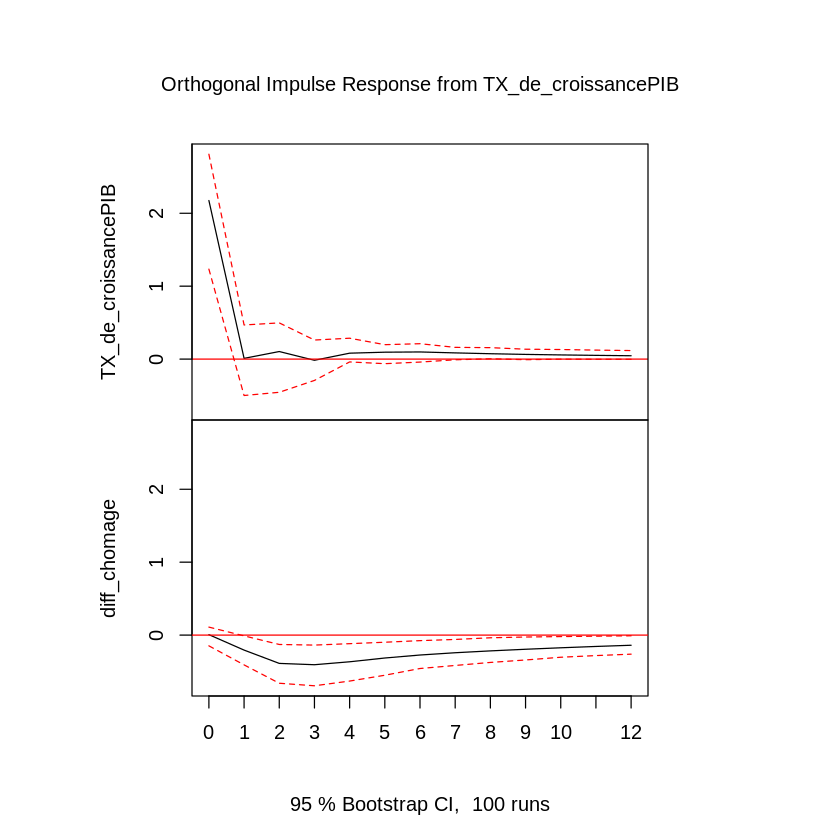

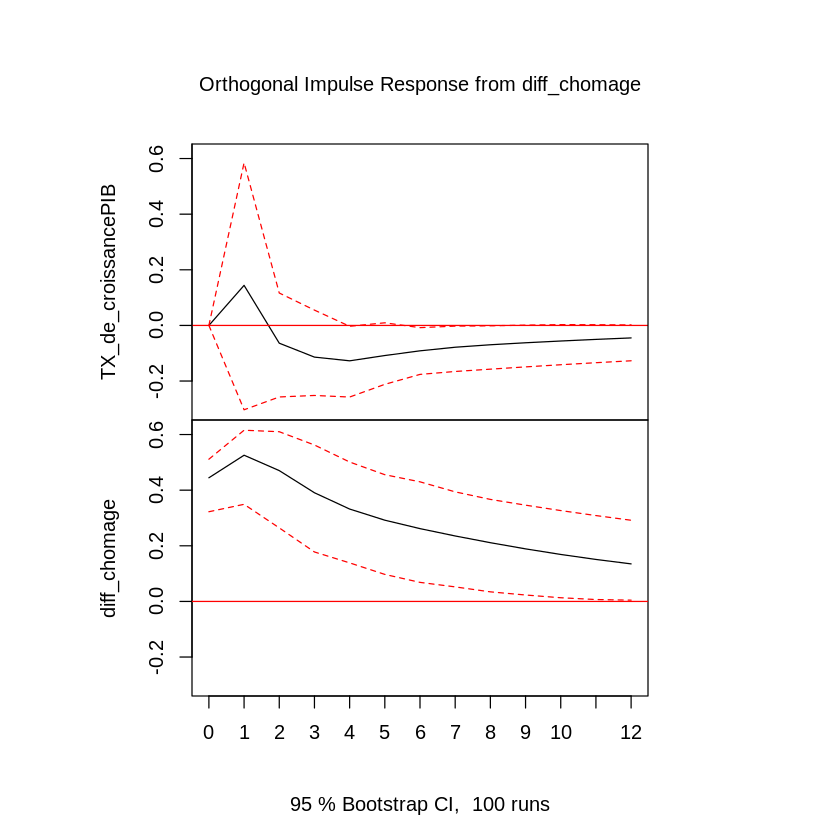

In [ ]:
VAR1 <-VAR(y =endogen[,c("TX_de_croissancePIB","diff_chomage")],type="const",lag.max = 2)

irf<-irf(VAR1,n.ahead = 12,ortho = TRUE,ci=0.95)
plot(irf)

Sur tous les graphiques, nous pouvons voir que plus les retards augmentent plus nos variables tendent vers 0.

Nous remarquons, sur le premier graphique, qu'une augmentation du taux de croissance du PIB a un impact positif sur la même variable à très court terme. Cependant, dès le premier retard, cela n'est plus significatif car 0 appartient à l'intervalle de confiance.

Sur le second graphique, une augmentation du taux de croissance du PIB aura un effect opposé avec le taux de chômage. En effet, les valeurs de ce dernier sont négatives. Cependant, à très court terme, cela n'est pas significatif. Le choc n'a pas un effect immédiat sur la seconde variable. La diminution est significatif à partir du retard 2 jusqu'au douzième.

Les deux graphiques suivants illustrent un choc sur le taux de chômage. Nous remarquons, tout d'abord, que ce choc a un impact positif sur le taux de croissance du PIB mais cet impact n'est pas significatif. Nous ne pouvons pas le prendre en compte

Ce même choc aura un impact positif sur la même variable. En effet, le taux ed chômage augmente dès le temps 0 entre les valeurs 0.4 et 0.6. Il tend à diminuer et à se rapprocher vers 0 dans le temps.



Dans un second temps, nous effectuons l'estimation des fontions réponses par par les projections locales.

In [ ]:
install.packages('lpirfs')
library(lpirfs)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘miscTools’, ‘rbibutils’, ‘iterators’, ‘bdsmatrix’, ‘collapse’, ‘maxLik’, ‘Rdpack’, ‘Formula’, ‘doParallel’, ‘foreach’, ‘gridExtra’, ‘plm’




[[1]]
NULL


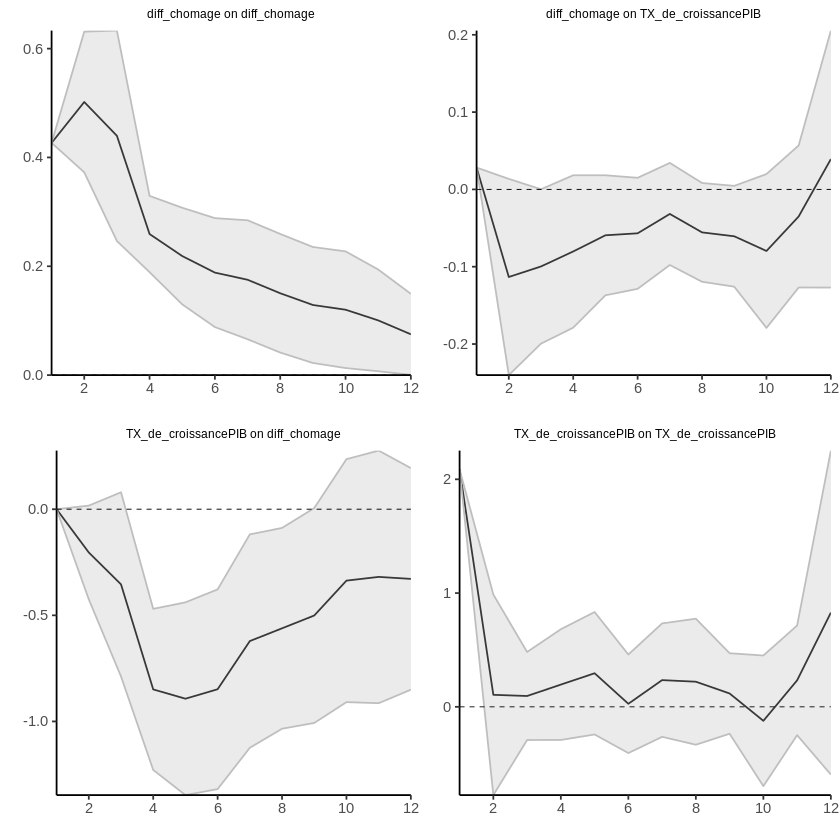

In [ ]:
irf_LP <-lp_lin(endog_data = as.data.frame(endogen),
                    lags_endog_lin = NaN,
                    lags_criterion = 'BIC',
                    max_lags = 2,
                    trend = 0,
                    shock_type = 0,
                    confint=1.96,
                    hor=12,
                    adjust_se=TRUE)

plot(irf_LP)

Comme vu précédemment, nous observons une nouvelle fois qu'un choc sur diffchomage a un impact positif sur lui même qui s'estompe dans le temps. Ce même choc sur le taux de croissance du PIB n'a pas d'impact significatif même si nous observons un effet négatif sur cette dernière variable.

Un choc sur le taux de croissance du PIB a un impact négatif sur le taux de chômage. Comme vu précédemment, nous observons une nouvelle fois que le choc n'est pas immédiat. Il devient significatif autour de 3 retards jusqu'au dixième.
Ce même choc sur la variable du taux de croissance du PIB est positif et significatif jusqu'à 1 retard. Il n'est plus significatif par la suite.


Nous pouvons maintenant afficher les valeurs de ces fonctions d'impulsion-réponse pour les chocs sur le taux de chômage (variable placée en première position dans notre dataframe).

In [ ]:
irf_LP$irf_lin_mean[,,1]

0.42679114,0.5018809,0.43972055,0.25919684,0.21871483,0.18832157,0.17518234,0.15037749,0.12880650,0.12013565,0.10050777,0.07491324,0.05561791
0.02821605,-0.1132802,-0.09964663,-0.08026075,-0.05935084,-0.05679464,-0.03174323,-0.05559674,-0.06063418,-0.07965233,-0.03502615,0.03921924,-0.04491377


Nous pouvons maintenant afficher les valeurs de ces fonctions d'impulsion-réponse pour les chocs sur le taux de croissance du PIB (variable placée en deuxième position dans notre dataframe).

In [ ]:
irf_LP$irf_lin_mean[,,2]

0.000000,-0.2039232,-0.35403377,-0.8490440,-0.8928668,-0.84820301,-0.6212306,-0.5611612,-0.5007610,-0.3365073,-0.3189213,-0.3283124,-0.26492169
2.087763,0.1058435,0.09537751,0.1956633,0.2952857,0.02696272,0.2349438,0.2209295,0.1173981,-0.1227222,0.2329470,0.8282582,0.02227326


### Décomposition de la variance

Nous allons maintenant étudier la décomposition de la variance dans notre modèle. Cela permet de mieux comprendre la contribution relative de différentes sources de variation dans le phénomène étudié.

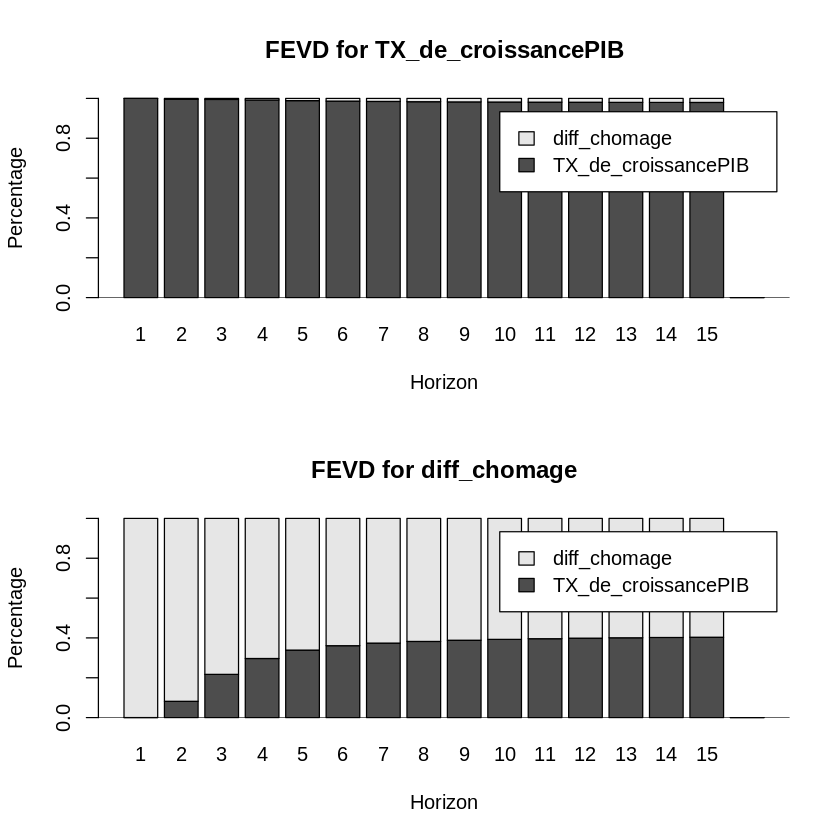

In [ ]:
dec_var <-fevd(VAR1,n.ahead=15)
plot(dec_var)

La part du taux de chômage dans la variance du PIB est très faible, voir nulle.
A l'inverse, la part du taux de croissance du PIB dans la variance du taux de chômage est relativement élevée, atteignant 40%. Nous remarquons aussi que la part de la variance du taux de croissance du PIB dans la variance du taux de chômage est nulle au temps 0. Cela confirme les résultats précédents; l'impact d'un choc sur le taux de croissance du PIB n'est pas immédiat sur le taux de chômage.

Cela confirme la relation de causalité du taux de croissance du PIB vers le taux de chômage.

## Prévisions de la série modélisée

         Length Class  Mode   
fcst       2    -none- list   
endog    108    mts    numeric
model     10    varest list   
exo.fcst   0    -none- NULL   

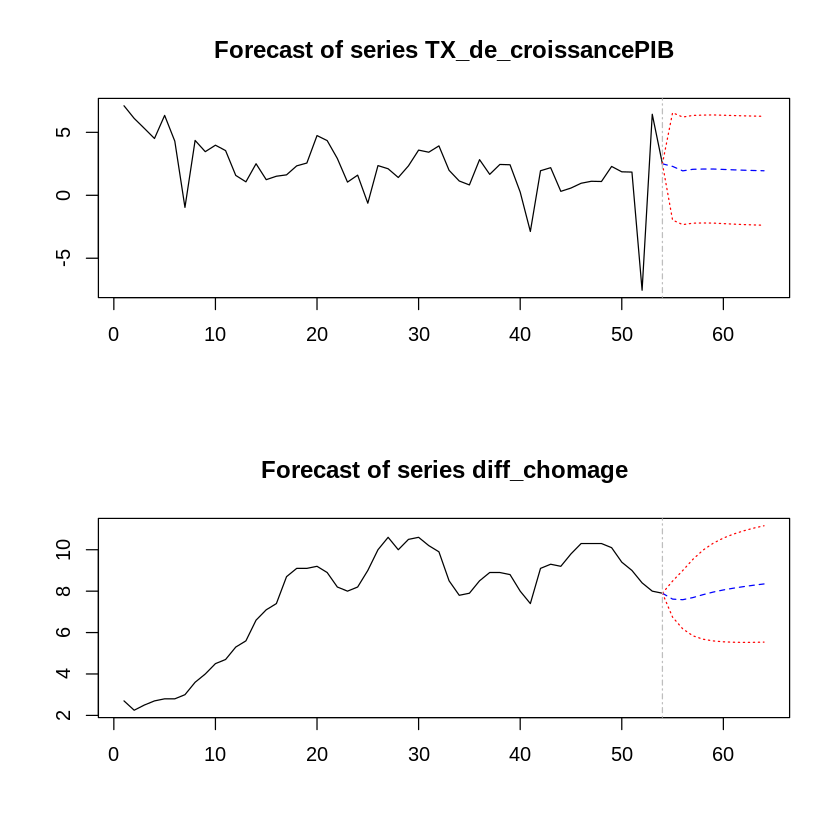

In [ ]:
forecast<-predict(VAR1,n.ahead = 10, ci=0.95)
summary(forecast)
plot(forecast)

On remarque que ces prévisions indiquent que le chômage aura tendant à augmenter légèrement dans les prochaines années tandis que la croissance du PIB restera constant ou diminuera légèrement.

## Test de cointégration de Johansen

Le test de cointégration de Johansen permet de mettre en évidence l'existence de relations de cointégration entre plusieurs séries temporelles. On s'intéresse donc à la présence de relations de long terme entre les variables.

Les hypothèses de ce test sont les suivantes :

$$
\left\lbrace
\begin{array}{l}
H0: r \leq k\\
H1: r > k
\end{array}
\right.
$$
Avec r le rang de la matrice de variance-covariance.

La statistique de test est telle que $TR = -T \sum_{i=k+1}^{n}ln(1-\hat \lambda_i)$

La règle de décision nous indique que nous rejettons l'hypothèse nulle HO si TR > VC où VC est la valeur au seuil 5% tabluée par Johansen et Juselius.

Le test de cointégration de Johansen est généralement utilisé pour déterminer s'il existe une relation de cointégration entre plusieurs séries temporelles, ce qui implique qu'elles partagent une tendance commune malgré le fait qu'elles puissent être I(1) individuellement. Le test de Johansen suppose que toutes les séries sont intégrées du même ordre, ce qui signifie qu'elles ont la même propriété d'ordre d'intégration

Dans notre cas, il n'est donc pas intéressant d'effectuer ce test. En effet, ayant une série temporelle qui suit un modèle I(O) + C + T et une autre I(1), nous ne pouvons trouver des résultats intéressant de cointégration.

## Estimation du VECM

N'ayant pu effectuer le test de Johansen à cause de nos séries temporelles, nous ne pouvons pas estimer le VECM puisqu'il n'existe pas de relation de cointégration entre nos deux variables.


# Conclusion

Pour conclure, les deux séries choisies : le taux de croissance du PIB et le taux de chômage en France de 1968 à 2022 nous apportent un résultat final intéressant.
En effet, le taux de croissance du PIB est stationnaire dans le temps tandis que celui du chômage ne l'est pas. Nous l'avons donc différentié une fois afin de pouvoir l'étudier.
Suite à cela, nous obtenons deux séries temporaires stationnaires sur lesquelles nous pouvons modéliser le modèle ARMA associé. Nous avons choisi d'étudier principalement le taux de croissance du PIB. Nous observons un modèle ARMA(1,1), stationnaire, où les coefficients sont significatifs.

Concernant ses résidus, ils ne suivent pas une loi normale. Cela s'explique par les chocs qu'a pu connaitre le PIB français, notamment en 2008 et en 2020 avec la crise des subprimes et le COVID-19. Nous avons donc modélisé un nouveau modèle avec des indicatrices dans le but d'observer la normalité des résidus à l'aide du test de Jarque Bera. Sans ces chocs, les résidus du modèle suivent une loi normale.

Nous remarquons également que nos résidus présentent un effet ARCH. Cela ne nous surprend pas en vue du graphique, que vous pouvez retrouver en première partie. En effet, la variance n'est pas constante dans le temps. Les chocs sont à l'origine de cette irrégularité.

Nous avons terminé la partie univariée avec les prévisions. Nous remarquons que la croissance du PIB français devrait continuer d'augmenter, dans des proportions moindres qu'avant les années 2000. Le taux de croissance du PIB devrait augmenter d'environ 1% sur les trois prochaines années.

D'un point de vue économique, tous ces résultats semblent cohérents. En effet, les chocs que peuvent connaitre la France comme les différents pays ont des effets sur les revenus de ces derniers. Le PIB français évolue dans le temps et connait des beaux jours comme des jours plus compliqués. Cependant, il reste stationnaire dans le temps. De plus, il est normal que nos prévisions soient plus faibles qu'avant car la croissance des différents pays comme la France a notamment eu lieu avant les années 2000. Actuellement, les pays ont une croissance du PIB plus faible mais qui augmente tout de même.

Grâce à la modélisation multivariée de nos séries nous avons pu analyser les relations de causalité. Suite au test de Granger et à l'analyse des fonctions d'impulsion-réponse nous avons conclu à l'existence d'une relation de causalité du taux de croissance du PIB vers le taux de chômage. L'existence d'une telle relation est tout à fait prévisible puisque l'activité économique impacte le marché du travail mais si cet impact n'est pas immédiat. En effet, dans un contexte de récession, l'activité productive diminue, les entreprises embauchent moins et le chômage augmente en conséquence.

On note cependant que les résultats que nous avons obtenu ne mettent pas en évidence une relation de causalité du taux de chômage vers le taux de croissance du PIB. Ceci est surprenant puisque selon la loi d'OKUN, il existe une relation linéaire négative entre le taux de chômage et le taux de croissance du PIB. Dans ce cadre, un choc sur le taux de chômage devrait avoir un impact significatif sur le taux de croissance du PIB.

